## Problem Statement
This project addresses a real life business challenge of IT Service Management (ITSM). This is one of the known challenges in IT industry where alot of time is wasted in IT support ticket classification. The problem that the IT industry is facing right now can be described as follows:

1. In Helpdesk, almost 25–30% of incident tickets are not routed to the right team and the tickets keep roaming around and around and by the time it reaches the right team, the issue might have widespread and reached the top management inviting a lot of trouble. Additional effort needed for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service.

 — this problem could have been solved easily if there was an automatic mechanism to route the incident ticket to the right category and right team.

***Guided by powerful AI techniques that can classify incidents to right functional groups can help organizations to reduce the resolving time of the issue and can focus on more productive tasks***.

2. Another far fetched goal can be automatic creation and classification of tickets that are registered on help desk via telephonic call. The frequency of the calls received at the help desk at the verge of a critical incident can be addressed by classification of all the calls to the same incident instead of creating multiple tickets which have same root cause.

3. An extension to the second use case can be a virtual bot that can respond and handle user tickets both on chat and on call.

However all the three use cases are very interesting, this project focusses on the first use case as per the limited scope.

## Project Goal & Process Overview
The goal is to build a classifier that can classify the tickets by analyzing.


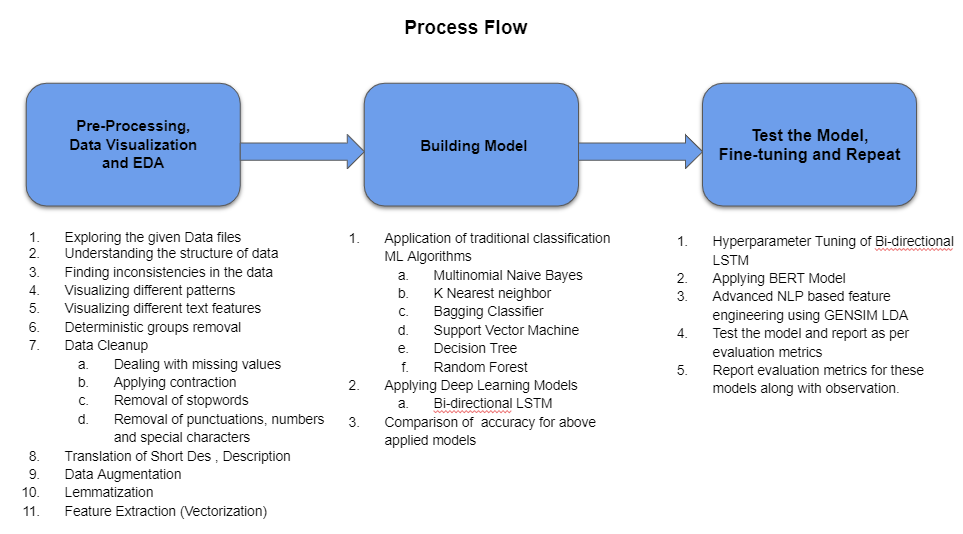

In [3]:
#@title Process Overview
from IPython.display import Image 

Image("/content/drive/My Drive/Colab Notebooks/AI ML/Projects/Capstone Project/ProcessFlow.PNG", width=900)

## Importing Required Libraries

In [ ]:
!pip install googletrans
!pip install langdetect
!pip install Unidecode

In [ ]:
#For numerical libraries
import numpy as np
#To handle data in the form of rows and columns
import pandas as pd
#importing seaborn for statistical plots
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
import os
from pickle import dump
from pickle import load
from langdetect import detect_langs
from langdetect import detect
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_curve,f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import  classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.layers import GlobalAveragePooling1D, Embedding, LSTM
from tensorflow.keras.models import Model
from keras.regularizers import L1L2
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional,MaxPooling1D ,SpatialDropout1D
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import preprocessing
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud


import data_trans as tr
import data_augmentation as da
import data_cleaning as dc
import data_rules as dr

## Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
project_path = "/content/drive/My Drive/Colab Notebooks/capstone project/"

In [ ]:
#reading the file into pandas dataframe
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/capstone project')

In [ ]:
df = pd.read_excel('input_data.xlsx')
print(df.shape)

(8500, 4)


In [ ]:
#checking the head of the data frame
df.head(5)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
#Check the last few records of the dataset
df.tail()

,Short description,Description,Caller,Assignment group
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62
8499,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49


### Exploratory Data Quality Report

**Data Types and Description**

In [ ]:
#To show the detailed summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
#shape of data (#Rows, #Columns)
df.shape

(8500, 4)

**Analyze the distribution of the dataset**

In [ ]:
df.describe().T

,count,unique,top,freq
Short description,8492,7481,password reset,38
Description,8499,7817,the,56
Caller,8500,2950,bpctwhsn kzqsbmtp,810
Assignment group,8500,74,GRP_0,3976


In [ ]:
#Check the number of groups
df["Assignment group"].nunique()

74

In [ ]:
#Missing value check
df.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

**Visualizing Distribution of Tickets across different Groups**

Text(0, 0.5, 'No.of tickets')

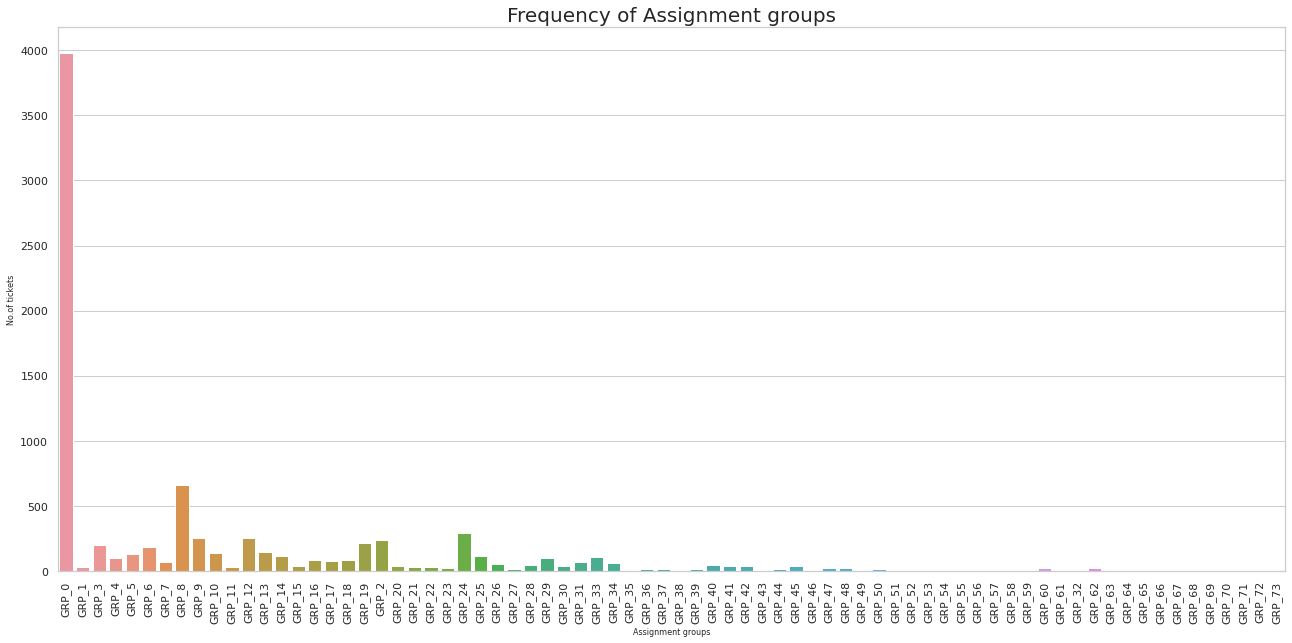

In [ ]:
plt.figure(figsize=(22,10))
sns.set_style("whitegrid")
sns.countplot("Assignment group",data=df)
plt.xticks(rotation=90)
plt.title("Frequency of Assignment groups",fontsize=20)
plt.xlabel("Assignment groups",fontsize=8)
plt.ylabel("No.of tickets",fontsize=8)

In [ ]:
dict(df['Assignment group'].value_counts())

{'GRP_0': 3976,
 'GRP_1': 31,
 'GRP_10': 140,
 'GRP_11': 30,
 'GRP_12': 257,
 'GRP_13': 145,
 'GRP_14': 118,
 'GRP_15': 39,
 'GRP_16': 85,
 'GRP_17': 81,
 'GRP_18': 88,
 'GRP_19': 215,
 'GRP_2': 241,
 'GRP_20': 36,
 'GRP_21': 29,
 'GRP_22': 31,
 'GRP_23': 25,
 'GRP_24': 289,
 'GRP_25': 116,
 'GRP_26': 56,
 'GRP_27': 18,
 'GRP_28': 44,
 'GRP_29': 97,
 'GRP_3': 200,
 'GRP_30': 39,
 'GRP_31': 69,
 'GRP_32': 4,
 'GRP_33': 107,
 'GRP_34': 62,
 'GRP_35': 1,
 'GRP_36': 15,
 'GRP_37': 16,
 'GRP_38': 3,
 'GRP_39': 19,
 'GRP_4': 100,
 'GRP_40': 45,
 'GRP_41': 40,
 'GRP_42': 37,
 'GRP_43': 5,
 'GRP_44': 15,
 'GRP_45': 35,
 'GRP_46': 6,
 'GRP_47': 27,
 'GRP_48': 25,
 'GRP_49': 6,
 'GRP_5': 129,
 'GRP_50': 14,
 'GRP_51': 8,
 'GRP_52': 9,
 'GRP_53': 11,
 'GRP_54': 2,
 'GRP_55': 8,
 'GRP_56': 3,
 'GRP_57': 2,
 'GRP_58': 3,
 'GRP_59': 6,
 'GRP_6': 184,
 'GRP_60': 20,
 'GRP_61': 1,
 'GRP_62': 25,
 'GRP_63': 3,
 'GRP_64': 1,
 'GRP_65': 11,
 'GRP_66': 4,
 'GRP_67': 1,
 'GRP_68': 3,
 'GRP_69': 2,
 'GRP_7'

### Analysis of Short Description Column

In [ ]:
pd.set_option('display.max_colwidth',None)   # To display full length value of columns

In [ ]:
#Length of each 'Short desccription'
df['short_desc_len'] = df['Short description'].astype(str).apply(len)

#Lets get the number of words in each 'Short description'
df['short_des_word_count'] = df['Short description'].apply(lambda x: len(str(x).split()))
df.head()

,Short description,Description,Caller,Assignment group,short_desc_len,short_des_word_count
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwir pjlcoqds,GRP_0,11,2
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpb komuaywn,GRP_0,7,1
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0,18,5
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,29,5
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,12,2


In [ ]:
print ('Maximum length of single record in Short Description ', df['short_desc_len'].max())
print ('Minimum length of single record in Short Description ', df['short_desc_len'].min())
print ('Average length of single record in Short Description', df['short_desc_len'].mean())

print ('Maximum Word count of single record of Short Description', df['short_des_word_count'].max())
print ('Minimum Word count of single record of Short Description', df['short_des_word_count'].min())
print ('Average Word count of single record of Short Description', df['short_des_word_count'].mean())

Maximum length of single record in Short Description  159
Minimum length of single record in Short Description  1
Average length of single record in Short Description 47.22188235294118
Maximum Word count of single record of Short Description 28
Minimum Word count of single record of Short Description 1
Average Word count of single record of Short Description 6.9282352941176475


In [ ]:
#Total words in the 'Short Description'
short_des_all_words = list(df['Short description'].str.lower().str.split(' ', expand=True).stack().unique())
print ('Total words in Short Description Column', len(short_des_all_words))

Total words in Short Description Column 10571


### Analysis of Description Column

In [ ]:
# Length of each description
df['Desc_len'] = df['Description'].astype(str).apply(len)

# we are temporarily creating a column in the dataframe for the number of words
df['Des_word_count'] = df['Description'].apply(lambda x: len(str(x).split(" ")))
df.head(5)

,Short description,Description,Caller,Assignment group,short_desc_len,short_des_word_count,Desc_len,Des_word_count
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwir pjlcoqds,GRP_0,11,2,206,29
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpb komuaywn,GRP_0,7,1,194,23
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0,18,5,87,9
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,29,5,29,5
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,12,2,12,3


In [ ]:
print ('Maximum length of single record of Description', df['Desc_len'].max())
print ('Minimum length of single record of Description', df['Desc_len'].min())
print ('Average length of single record of Description', df['Desc_len'].mean())

print ('Maximum Word count of single record of Description', df['Des_word_count'].max())
print ('Minimum Word count of single record of Description', df['Des_word_count'].min())
print ('Average Word count of single record of Description', df['Des_word_count'].mean())

Maximum length of single record of Description 13001
Minimum length of single record of Description 1
Average length of single record of Description 204.02823529411765
Maximum Word count of single record of Description 1417
Minimum Word count of single record of Description 1
Average Word count of single record of Description 28.877294117647057


In [ ]:
#Total words in the 'Description' column
des_all_words = list(df['Description'].str.lower().str.split(' ', expand=True).stack().unique())
print ('Total words in Description Column', len(des_all_words))

Total words in Description Column 35024


**Lets see the Top 5 longest descriptions!**

In [ ]:
df[["Description","Des_word_count"]].sort_values(by="Des_word_count",ascending=False).head(5)

Description  Des_word_count
7345  we are seeing activity indicating the host at 46.161.9.35 is conducting a vulnerability scan. these scans are used to identify specific vulnerabilities on a remote host that could be exploited to potentially interfere with service availability, execute code, or usa an attacker with unauthorized access. the results of this scan could be used for future attacks or exploitation of the targeted host(s). \r\n\r\nbased on our internet visibility we are detecting this as a non-targeted broadscan. similar activity from this source has been detected across our client base. please consider blocking this ip address and investigating the host for any malicious scrip\r\n\r\nwe are escalating this incident to you via a medium priority ticket as per our default event handling procedures. if you would like us to handle these incidents differently in the future (see below for handling options), or if you have any further questions or concerns, please let us know either by corresponding to us via this ticket and delegating the ticket back to the soc, or by calling us at .\r\n\r\n1)full escalation for broadscanning alerts (explicit notification via a high priority ticket and phone call)\r\n2)autoresolve for broadscanning alerts directly to the portal (no explicit notification but events will be available for reporting purposes in the portal)\r\n\r\nsincerely,\r\nsecureworks soc\r\n\r\n=========================\r\nevent data\r\n=========================\r\nrelated events: \r\nevent id: 43589636\r\nevent summary: 20369 vid12631 suspicious executable file upload php http incoming\r\noccurrence count: 2\r\nevent count: 2\r\n\r\nhost and connection information\r\nsource ip: 46.161.9.35\r\nsource port: 52806\r\nsource ip geolocation: st pethrywrsburg, rus\r\ndestination ip: 172.20.10.37\r\ndestination port: 80\r\nconnection directionality: incoming\r\nprotocol: tcp\r\nhttp method: post\r\nhttp status code: 404\r\nuser agent: mozilla/5.0 (windows nt 6.1; rv:34.0) gecko/31211212 firefox/34.0\r\nhost: www.companyipg.com\r\nfull url path: /wp-content/plugins/inboundio-markhtyeting/admin/partials/csv_uploader.php\r\n\r\ndevice information\r\ndevice ip: 172.20.10.208\r\ndevice name: isensor02.company.com\r\nlog time: 2016-08-14 at 20:38:30 utc\r\naction: not blocked\r\nvendor eventid: 655375\r\ncvss score: -1 \r\nvendor priority: 3\r\nvendor version: 7\r\nvendor reference: vid, 12631\r\nfile name: wp-setup.php\r\n\r\nscwx event processing information\r\nsherlock rule id (sle): 891631\r\ninspector rule id: 277082\r\ninspector event id: 61024435\r\nontology id: 200020003203722280\r\nevent type id: 200020003203056732\r\nagent id: 103793\r\n\r\nevent detail:\r\n[**] [1:21131470:5] 20369 vid12631 suspicious executable file upload php http incoming [**]\r\n[classification: none] [priority: 3] [action: accept_passive] [impact_flag: 0] [impact: 0] [blocked: 2] [vlan: 0] [mpls label: 0] [pad2: 1]\r\n[sensor id: 602984][event id: 655375][time: 2582318221.714106]\r\n[xref => vid, 12631]\r\n[src ip: 46.161.9.35][dst ip: 172.20.10.37][sport/itype: 52806][dport/icode: 80][proto: 6]\r\n08/14/2016-20:38:30.714106 46.161.9.35:52806 -> 172.20.10.37:80\r\ntcp ttl:49 tos:0x68 id:4444 iplen:20 dgmlen:714 df\r\n***ap*** seq: 0x49c51796 ack: 0x9698e7c8 win: 0x73 tcplen: 32\r\ntcp options (3) => nop nop ts: 380683315 9237098 \r\n==pcap 1==\r\n\r\n\r\n[ex http_uri 9: /wp-content/plugins/inboundio-markhtyeting/admin/partials/csv_uploader.php]\r\n\r\n[ex http_hostname 10: www.companyipg.com]\r\n\r\n[o:security]\r\n\r\nascii packet(s):\r\n==pcap 1 ascii s==\r\n.......wz...........eh...\@.1.gm...#...%.f.pi..........sk2...........|..post./wp-content/plugins/inboundio-markhtyeting/admin/partials/csv_uploader.php.http/1.1..host:.www.companyipg.com..content-length:.297..accept-encoding:.gzip,.deflate..accept:.*/*..user-agent:.mozilla/5.0.(windows.nt.6.1;.rv:34.0).gecko/31211212.firefox/34.0..connection:.keep-alive..content-type:.multipart/form-data;.bounda

### Analyzing Caller Column

In [ ]:
#Removing space between Caller Full Name to count unique callers
df['Caller']= df['Caller'].replace(" ","", regex=True)
Unique_Callers= df['Caller'].str.split(expand=True).stack().value_counts()
print ('Number of Unique callers in the Dataset', len(df['Caller'].str.split(expand=True).stack().value_counts()))

Number of Unique callers in the Dataset 2950


**Lets see the top 10 callers in raising tickets**

In [ ]:
top_callers = df.groupby(['Caller']).size().nlargest(10)
print(top_callers)

Caller
bpctwhsnkzqsbmtp    810
ZkBogxibQsEJzdZO    151
fumkcsjisarmtlhy    134
rbozivdqgmlhrtvp     87
rkupnshbgsmzfojw     71
jloygrwhacvztedi     64
spxqmiryzpwgoqju     63
oldrctiubxurpsyi     57
olckhmvxpcqobjnd     54
dkmcfreganwmfvlg     51
dtype: int64


**Lets check if any caller raised the tickets for multiple groups**

In [ ]:
top_c = df['Caller'].groupby(df['Assignment group']).value_counts()
grp_caller =pd.DataFrame(top_c.groupby(level=0).nlargest(5).reset_index(level=0, drop=True))
multy_caller = grp_caller[grp_caller.Caller.duplicated()]
grp_caller.head(20)

Caller
Assignment group Caller                  
GRP_0            fumkcsjisarmtlhy     132
                 rbozivdqgmlhrtvp      86
                 olckhmvxpcqobjnd      54
                 efbwiadpdicafxhv      45
                 mfeyoulindobtzpw      13
GRP_1            bpctwhsnkzqsbmtp       6
                 jloygrwhacvztedi       4
                 jyoqwxhzclhxsoqy       3
                 spxqmiryzpwgoqju       3
                 kbnfxpsygehxzayq       2
GRP_10           bpctwhsnkzqsbmtp      60
                 ihfkwzjderbxoyqk       6
                 dizquolfhlykecxa       5
                 gnasmtvxcwxtsvkm       3
                 hlrmufzxqcdzierm       3
GRP_11           ctvaejbomjcerqwo       7
                 tghrloksjbgcvlmf       2
                 vlymsnejwhlqxcst       2
                 dnwfhpylzqbldipk       1
                 fbgetcznjlsvxura       1

In [ ]:
multy_caller_unique = [idx[1] for idx in multy_caller.index[multy_caller.Caller.unique()]]
multy_caller_unique

['hlrmufzxqcdzierm',
 'fbgetcznjlsvxura',
 'gnasmtvxcwxtsvkm',
 'ihfkwzjderbxoyqk',
 'tqfnalpjqyoscnge',
 'fmqubnvskcxpeyiv',
 'tghrloksjbgcvlmf',
 'jwqyxbzsadpvilqu',
 'nuhfwpljojcwxser',
 'oldrctiubxurpsyi',
 'vlymsnejwhlqxcst',
 'dkmcfreganwmfvlg',
 'bpctwhsnkzqsbmtp',
 'spxqmiryzpwgoqju',
 'obanjrhgrnafleys']

The above callers have raised tickets for multiple groups.

**As per our above analysis, we dont see any significance relationship between the 'Caller' and group to which tickets are assigned. so for the model building, we may can avoid this column**

**Let's analyse the non-english data present in the dataset**

In [ ]:
df.columns

Index(['Short description', 'Description', 'Caller', 'Assignment group',
       'short_desc_len', 'short_des_word_count', 'Desc_len', 'Des_word_count'],
      dtype='object')

In [ ]:
# Merge the Short description and Description column texts to create a new column
df.insert(loc=8, 
              column='ticket_summary', 
              allow_duplicates=True, 
              value=list(df['Short description'].str.strip() + ' ' + df['Description'].str.strip()))

In [ ]:
#df['Language'] = df['ticket_summary'].fillna(' ').apply(detect)

### Inference and Corrective Actions

1) There are Total 74 groups but there is serious **class imbalance i.e. “GRP_0” has almost 50% of all records**. This demands the need for data augmentation. Also there are lot of groups which have very few number of tickets.

2) After the manual data analysis, it seems that there can be certain tickets and groups which have certain patterns say e.g. certain combination of short description , description and caller is always assigned to particular group. To handle these types of ticket assignments we do not need machine learning. There can be deterministic rules which can take care of these issues. **Also having deterministic rules for groups with smaller number of records helps us in avoiding oversampling of the smaller groups**.
**These smaller number of groups and records will not be part of Machine learning flow. Deterministic Rules assignments will run before machine learning model predictions**. 

3) Also there are 8 missing Short Descriptions and 1 missing Description.  where we have missing values in the 'Description' column, the corresponding 'Short description' value is present. Also where the 'Short description' column has NaN values, the corresponding 'Description' column values are present. Further processing, we are going to merge these two columns, so we no need to delete these NaN rows.

4) Manual Analysis of data shows that the description needs to be cleaned up for removal of stopwords (with enhanced list of stopwords which are relevant to this dataset), punctuations, special characters, numbers etc. 

5) There are certain tickets which are in Non-English languages. They need to be detected and translated into english before carrying out any further pre-processing.

5) Its been observed that there are lot of spelling mistakes in many ticket descriptions. to get right inference out of them spelling correction is required to be executed on these tickets.


Summary of Pre-Processing Steps (Before feature engineering)

- Identify Determinstic Rules 
- Data Cleaning up Actvities.
- Data Translation for non-english tickets.
- Spelling Correction
- Data Augmentation to balance the dataset for all groups
 


**Considering the modularization and reusability of above functions seperate function files (.py) have been created and imported into this main file.**

#### Remove Deterministic Groups From DataSet

In [ ]:
#Total groups in dataset before removal
df['Assignment group'].nunique()

74

In [ ]:
#Invoke the function for Removal of Determinstic groups from data_rules.py file
df_groupsupdated = dr.removedeterminsticgroups(df)

In [ ]:
#Remaining groups after the removal of the determinstic groups
df_groupsupdated['Assignment group'].nunique()

54

#### Data Cleaning Actvities
    - Removal duplicates
    - Removal of punctuations
    - Removal of stopwords (with extended set relevant for this dataset.
    - Removal of numbers and special characters
    - Applying data contractions

In [ ]:
#Invoke the data cleaning function from data_cleaning.py file
cleanDF=dc.data_cleaning(df)

In [ ]:
#Check sample record which needed multiple cleaning operations
print(cleanDF.iloc[137][['Short description']])
print(cleanDF.iloc[137][['Clean_Shrt_Desc_SWR']])
print(cleanDF.iloc[137][['Description']])
print(cleanDF.iloc[137][['Clean_Desc_SWR']])

Short description    job Job_1879 failed in job_scheduler at: 10/28/2016 11:01:00  
Name: 138, dtype: object
Clean_Shrt_Desc_SWR    job job failed job scheduler
Name: 138, dtype: object
Description    received from: monitoring_tool@company.com\r\n\r\njob Job_1879 failed in job_scheduler at: 10/28/2016 11:01:00
Name: 138, dtype: object
Clean_Desc_SWR    monitoring job job failed job scheduler
Name: 138, dtype: object


In [ ]:
#check presence of null values in clean dataset
cleanDF.isnull().sum()

Short description            0
Description                  0
Caller                       0
Assignment group             0
short_desc_len               0
short_des_word_count         0
Desc_len                     0
Des_word_count               0
ticket_summary               9
word_count                   0
char_count                   0
stopwords                    0
hastags                      0
numerics                     0
upper                        0
Short description_Contrt     0
Description_Contrt           0
punct_Short description      0
punct_Description            0
Clean Short Description      0
Clean Description            0
Clean Caller                 0
Clean Short Description_1    0
Clean Description_1          0
Clean_Shrt_Desc_SWR          0
Clean_Desc_SWR               0
Clean_Shrt_Desc_lem          0
Clean_Desc_lem               0
dtype: int64

#### Translating cleaned data frame

In [ ]:
translatedDF=tr.TransCol(cleanDF,"Clean_Shrt_Desc_SWR","Clean_Desc_SWR")

In [ ]:
# Save the dataframe into pickle file
import pickle
pickle.dump(translatedDF, open('TranslatedDataframe.pkl', 'wb'))

In [ ]:
translatedDF.head()

,Short description,Description,Caller,Assignment group,short_desc_len,short_des_word_count,Desc_len,Des_word_count,ticket_summary,word_count,char_count,stopwords,hastags,numerics,upper,Short description_Contrt,Description_Contrt,punct_Short description,punct_Description,Clean Short Description,Clean Description,Clean Caller,Clean Short Description_1,Clean Description_1,Clean_Shrt_Desc_SWR,Clean_Desc_SWR,Clean_Shrt_Desc_lem,Clean_Desc_lem,SD_translated,D_translated
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwirpjlcoqds,GRP_0,11,2,206,29,login issue -verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,35,190,12,0,0,0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,login issue,- verified user details. ( employee # & manager name ) \r\n - checked the user name in ad and reset the password.\r\n - advised the user to login and check.\r\n - caller confirmed that he was able to login.\r\n - issue resolved.,login issue,verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,spxjnwirpjlcoqds,login issue,verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,login issue,verified user details employee manager name checked user name ad reset password advised user login check caller confirmed login issue resolved,login issue,verified user detail employee manager name checked user name ad reset password advised user login check caller confirmed login issue resolved,login issue,verified user details employee manager name checked user name ad reset password advised user login check caller confirmed login issue resolved
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpbkomuaywn,GRP_0,7,1,194,23,"outlook received from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",26,141,12,0,0,0,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",outlook,"\r\n\r\nreceived from : hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team , \r\n\r\nmy meetings / skype meetings etc are not appearing in my outlook calendar , can somebody please advise how to correct this ? \r\n\r\nkind",outlook,from hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,hmjdrvpbkomuaywn,outlook,from hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,outlook,team meetings skype meetings etc appearing outlook calendar somebody advise correct kind,outlook,team meeting skype meeting etc appearing outlook calendar somebody advise correct kind,outlook,team meetings skype meetings etc appearing outlook calendar somebody advise correct kind
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodmybqkwia

In [ ]:
# load the model
TranslatedDataframe = load(open('TranslatedDataframe.pkl', 'rb'))

In [ ]:
TranslatedDataframe.head()

,Short description,Description,Caller,Assignment group,short_desc_len,short_des_word_count,Desc_len,Des_word_count,ticket_summary,word_count,char_count,stopwords,hastags,numerics,upper,Short description_Contrt,Description_Contrt,punct_Short description,punct_Description,Clean Short Description,Clean Description,Clean Caller,Clean Short Description_1,Clean Description_1,Clean_Shrt_Desc_SWR,Clean_Desc_SWR,Clean_Shrt_Desc_lem,Clean_Desc_lem,SD_translated,D_translated
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwirpjlcoqds,GRP_0,11,2,206,29,login issue -verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,35,190,12,0,0,0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,login issue,- verified user details. ( employee # & manager name ) \r\n - checked the user name in ad and reset the password.\r\n - advised the user to login and check.\r\n - caller confirmed that he was able to login.\r\n - issue resolved.,login issue,verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,spxjnwirpjlcoqds,login issue,verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved,login issue,verified user details employee manager name checked user name ad reset password advised user login check caller confirmed login issue resolved,login issue,verified user detail employee manager name checked user name ad reset password advised user login check caller confirmed login issue resolved,login issue,verified user details employee manager name checked user name ad reset password advised user login check caller confirmed login issue resolved
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpbkomuaywn,GRP_0,7,1,194,23,"outlook received from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",26,141,12,0,0,0,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",outlook,"\r\n\r\nreceived from : hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team , \r\n\r\nmy meetings / skype meetings etc are not appearing in my outlook calendar , can somebody please advise how to correct this ? \r\n\r\nkind",outlook,from hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,hmjdrvpbkomuaywn,outlook,from hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind,outlook,team meetings skype meetings etc appearing outlook calendar somebody advise correct kind,outlook,team meeting skype meeting etc appearing outlook calendar somebody advise correct kind,outlook,team meetings skype meetings etc appearing outlook calendar somebody advise correct kind
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodmybqkwia

#### Data Augmentation 
For creating new records for the groups which have smaller number of records. 
**It uses the Spacy library and Synonym based record generation technique.** 

In [ ]:
dataAugDF=da.data_augmentation_spacy(cleanDF,"Clean_Shrt_Desc_SWR","Clean_Desc_SWR")

In [ ]:
dataAugDF['Assignment_Group_Updated'].value_counts()

GRP_0     4000
GRP_60     800
GRP_21     800
GRP_7      800
GRP_14     800
GRP_36     800
GRP_11     800
GRP_6      800
GRP_32     800
GRP_8      800
GRP_24     800
GRP_9      800
GRP_50     800
GRP_4      800
GRP_25     800
GRP_19     800
GRP_62     800
GRP_27     800
GRP_52     800
GRP_22     800
GRP_30     800
GRP_59     800
GRP_41     800
GRP_49     800
GRP_26     800
GRP_13     800
GRP_56     800
GRP_23     800
GRP_53     800
GRP_63     800
GRP_45     800
GRP_48     800
GRP_28     800
GRP_37     800
GRP_5      800
GRP_44     800
GRP_15     800
GRP_10     800
GRP_42     800
GRP_33     800
GRP_47     800
GRP_65     800
GRP_12     800
GRP_31     800
GRP_29     800
GRP_3      800
GRP_34     800
GRP_18     800
GRP_40     800
GRP_17     800
GRP_20     800
GRP_16     800
GRP_2      800
Name: Assignment_Group_Updated, dtype: int64

In [ ]:
# Save the dataframe into pickle file
dump(dataAugDF, open('/content/drive/My Drive/Colab Notebooks/capstone project/AugmentedDataframe.pkl', 'wb'))

In [ ]:
# load the model
df = load(open('AugmentedDataframe.pkl', 'rb'))

## Lemmatization

Lemmatization is the process of converting a word to its base form, e.g., going to “go”. We use spaCy’s lemmatizer to obtain the lemma, or base form, of the words.

In [ ]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
#  function to lemmatize the descriptions
def lemmatize(sentence):
    spacy_doc = nlp(sentence) # Parse the sentence using the loaded 'en' model object `nlp`
    return " ".join([token.lemma_ for token in spacy_doc if token.lemma_ !='-PRON-'])

In [ ]:
# Apply the Lemmatization to ticket_summary
df['ticket_Desc_lemm'] = df['Description_updated'].apply(lemmatize)

In [ ]:
# Save the dataframe into pickle file
dump(df, open('LemmitizedDataframe.pkl', 'wb'))

In [ ]:
# load the model
df = load(open('LemmitizedDataframe.pkl', 'rb'))

In [ ]:
# Verify the data after lemmatization
df['ticket_Desc_lemm'].tail(10)

195      unable install crm app galaxy user samsung g...
121      mobile phone e mail receipt user jkuaslxe hr...
81       mobile phone e mail receipt user jkuaslxe hr...
125      can not make recieve call iphone can not mak...
227      can not make recieve call iphone can not mak...
164      unable install crm app galaxy user samsung g...
242      can not make recieve call iphone can not mak...
77       unable install crm app galaxy user samsung g...
195      mobile phone e mail receipt user jkuaslxe hr...
79       unable install crm app galaxy user samsung g...
Name: ticket_Desc_lemm, dtype: object

## WordCloud

Let's visualize the frequent words in all tickets

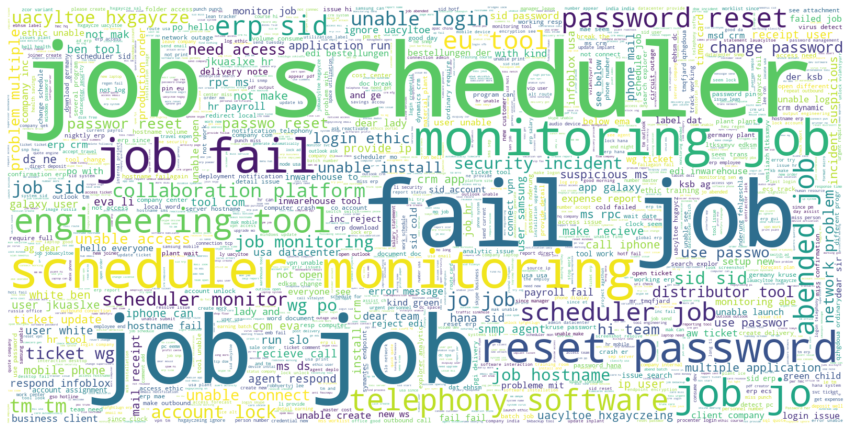

In [ ]:
text = (df['ticket_Desc_lemm']).to_string(index=False)
wordcloud = WordCloud(background_color='white',max_words = 2000 , width = 1600 , height = 800).generate(text)
#wordcloud = WordCloud(background_color='white',max_words = 2000 , width = 1600 , height = 800)
# plot the WordCloud image                        
plt.figure(figsize = (15, 12), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As we can see, If we look at the ticket descriptions overall, most of the tickets are for job scheduler fail, password reset, account lock,circuit issues etc

**As we have done with our all preprocessing steps, lets move further to create the model. First lets experiment with some of the classifier algorithms and see the performance.**

# MileStone 2 : Feature Engineering and Model Building using TF IDF

## Overview of this step:

- Generating Features using TF IDF over lemmatized data.
- Traditional machine learning algorithms meant for classification problem solving will be tried against the vectorized features generated out of TF IDF.
- Deep learning models such as Bidirectional LSTM will be leveraged.
- Comparison of the model accuracy for selecting best performing model.


## Vectorization using TF-IDF or Term Frequency(TF) — Inverse Dense Frequency(IDF)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['ticket_Desc_lemm'], df['Assignment_Group_Updated'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((34200,), (34200,), (11400,), (11400,))

In [ ]:
X_train.head()

0       bw job fail server issue bw job fail server ...
0       user wish set lan first priority internet us...
8       call vythytalyst uploading group contact crm...
0                                           and e and e
21      error message route card release route card ...
Name: ticket_Desc_lemm, dtype: object

In [ ]:
y_train.head()

0     GRP_14
0      GRP_3
8     GRP_40
0     GRP_30
21    GRP_45
Name: Assignment_Group_Updated, dtype: object

## Below classifiers will be run and compared:


1.   Multinomial Naive Bayes
2.   K Nearest neighbor
3.   Support Vector Machine
4.   Decission Tree
5.   Random Forest
6.   Adaboost  Classifier    
7.   Bagging Classifier 
8.   LSTM






### Multinomial Naive Bayes

In [ ]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)
y_train_pred_NB = clf.predict(count_vect.transform(X_train))
y_test_pred_NB = clf.predict(count_vect.transform(X_test))
print("Multinomial NaiveBayers :")
print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred_NB) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_test_pred_NB) * 100))

Multinomial NaiveBayers :
Training accuracy: 81.61%
Testing accuracy: 80.17%


### K Nearest Neighbor

In [ ]:
clf_knn = KNeighborsClassifier(n_neighbors=7,weights='uniform').fit(X_train_tfidf, y_train)
y_train_pred_knn = clf_knn.predict(count_vect.transform(X_train))
y_test_pred_knn = clf_knn.predict(count_vect.transform(X_test))
print("K Nearest Neighbours :")
print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred_knn) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_test_pred_knn) * 100))

K Nearest Neighbours :
Training accuracy: 88.99%
Testing accuracy: 86.00%


### Support Vector Machine

In [ ]:
clf_svc = LinearSVC().fit(X_train_tfidf, y_train)
y_train_pred_svc = clf_svc.predict(count_vect.transform(X_train))
y_test_pred_svc = clf_svc.predict(count_vect.transform(X_test))
print("Support Vector Machine :")
print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred_svc) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_test_pred_svc) * 100))

Support Vector Machine :
Training accuracy: 92.38%
Testing accuracy: 90.68%


### Decision Tree

In [ ]:
clf_tree = DecisionTreeClassifier().fit(X_train_tfidf, y_train)
y_train_pred_tree = clf_tree.predict(count_vect.transform(X_train))
y_test_pred_tree = clf_tree.predict(count_vect.transform(X_test))
print("Decision Tree Classifier :")
print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred_tree) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_test_pred_tree) * 100))

Decision Tree Classifier :
Training accuracy: 51.47%
Testing accuracy: 49.92%


### RandomForest Classifier

In [ ]:
clf_rand = RandomForestClassifier(n_estimators=100).fit(X_train_tfidf, y_train)
y_train_pred_rand = clf_rand.predict(count_vect.transform(X_train))
y_test_pred_rand = clf_rand.predict(count_vect.transform(X_test))
print("RandomForest Classifier:")
print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred_rand) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_test_pred_rand) * 100))

RandomForest Classifier:
Training accuracy: 83.68%
Testing accuracy: 82.10%


### AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier  
adaclassifier = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22) 
adaclassifier = adaclassifier.fit(X_train_tfidf, y_train) 
y_train_pred_ad = adaclassifier.predict(count_vect.transform(X_train))
y_test_pred_ad = adaclassifier.predict(count_vect.transform(X_test))
print("Adaboost Classifier:")
print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred_ad) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_test_pred_ad) * 100))

Adaboost Classifier:
Training accuracy: 11.99%
Testing accuracy: 12.20%


### BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier  
bgclassifier = BaggingClassifier(n_estimators=150, max_samples= .7, bootstrap=True, oob_score=True, random_state=22) 
bgclassifier = bgclassifier.fit(X_train_tfidf, y_train) 
y_train_pred_bgc = bgclassifier.predict(count_vect.transform(X_train))
y_test_pred_bgc = bgclassifier.predict(count_vect.transform(X_test))
print("Bagging Classifier:")
print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred_bgc) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_test_pred_bgc) * 100))

Bagging Classifier:
Training accuracy: 60.59%
Testing accuracy: 58.88%


**Comparing Classification Models**

In [ ]:
# Comparing models
models = []
models.append(('MNB', MultinomialNB()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=7)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('SVM', LinearSVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_train_tfidf, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

MNB: 0.769912 (0.005565)
KNN: 0.822193 (0.009594)
CART: 0.926520 (0.004764)
RFC: 0.944532 (0.003484)
SVM: 0.923216 (0.005350)


In [ ]:
# Save the models into pickle file
dump(models, open('MLModels.pkl', 'wb'))

In [ ]:
# load the model
models = load(open('MLModels.pkl', 'rb'))

**Boxplot algorithm comparison**

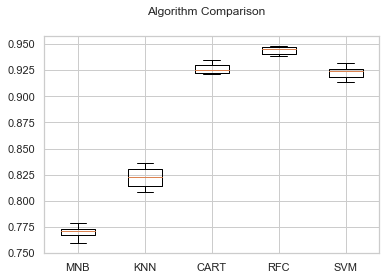

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### LSTM Model

**Creating Tokens using Keras Tokenizer class.**

In [ ]:
texts = df['ticket_Desc_lemm'].values
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
df['token_text_vocab'] = tokenizer.texts_to_sequences(texts)

In [ ]:
vocab_words = tokenizer.word_index.items()
len(vocab_words)

12289

In [ ]:
#Get the vocabulary size
num_words = len(tokenizer.word_index) +1
print (num_words)

12290


In [ ]:
#To view the 10 elements from dictionary
from itertools import islice
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

take(5, vocab_words)

[('e', 1), ('job', 2), ('f', 3), ('tool', 4), ('access', 5)]

In [ ]:
maxlen=300
max_features = 10000

In [ ]:
X = tokenizer.texts_to_sequences(df['ticket_Desc_lemm'])
X = pad_sequences(X, padding='post',maxlen = maxlen)
# Converting categorical labels to numbers.
y = pd.get_dummies(df['Assignment_Group_Updated']).values

In [ ]:
print("Number of Samples:", len(X))
print("Number of Labels: ", len(y))

Number of Samples: 45600
Number of Labels:  45600


**Get embedding using the pre-trained model Glove**

In [ ]:
#Get the Word Embeddings using Embedding file
EMBEDDING_FILE = 'glove.6B.200d.txt'
embeddings = {}
for o in open(EMBEDDING_FILE, encoding="utf8",errors='ignore'):
    word = o.split(" ")[0]
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    embeddings[word] = embd

In [ ]:
len(embeddings.values())

400000

In [ ]:
#Just checking the sample embeddings for the word 'outlook' which is from our corpus
embeddings['outlook']

array([ 0.25253  ,  0.30753  ,  0.54159  ,  0.0085215,  0.36576  ,
       -0.38342  , -0.002875 , -0.65564  ,  0.55872  ,  0.54463  ,
        0.5221   ,  0.67832  , -0.044136 , -0.45919  ,  1.3775   ,
        0.54288  , -0.05421  ,  0.36371  , -0.059071 , -0.56022  ,
        0.63958  ,  1.5561   , -0.75875  , -0.24567  , -0.099208 ,
        0.32084  , -0.31637  ,  0.51132  , -0.75753  , -0.008595 ,
       -0.47135  , -0.28668  , -0.76088  ,  0.089982 ,  0.82554  ,
       -0.44267  ,  0.017712 , -0.12609  , -0.35306  ,  0.58798  ,
       -0.079643 , -0.09144  , -0.69428  ,  0.7141   ,  0.098986 ,
       -0.15905  ,  0.20222  , -0.26678  , -0.71632  ,  0.14216  ,
       -0.35488  ,  0.66125  ,  0.13997  , -0.36635  , -0.65228  ,
        0.017395 , -0.28262  , -0.62002  , -0.10768  , -0.63378  ,
        0.36728  , -0.25112  , -0.0050054, -0.12513  ,  0.071162 ,
        0.25933  ,  0.46956  ,  0.41959  ,  0.38161  ,  0.33574  ,
        1.2079   ,  1.0156   , -0.33064  ,  0.049285 ,  0.6479

In [ ]:
#Create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

**Split the dataset for training and testing**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36480, 300), (9120, 300), (36480, 53), (9120, 53))

**Now lets Create the LSTM model (Bidirectional)**

In [ ]:
#parameters used
epochs = 10
batch_size = 60
embedding_size = 200

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=num_words, 
                        output_dim=embedding_size, 
                        weights=[embedding_matrix], 
                        input_length=maxlen, 
#                       mask_zero=True,
                        trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(53, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

### save the model so that you can use them again
output_dir = 'model_output/LSTM'

modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
X_train.shape

(36480, 300)

In [ ]:
y_train.shape

(36480, 53)

In [ ]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    callbacks=[modelcheckpoint,EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 36480 samples, validate on 9120 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
36480/36480 [==============================] - 941s 26ms/sample - loss: 2.1763 - acc: 0.4214 - val_loss: 1.1416 - val_acc: 0.6745
Epoch 2/10
36480/36480 [==============================] - 987s 27ms/sample - loss: 1.1242 - acc: 0.6709 - val_loss: 0.7414 - val_acc: 0.7811
Epoch 3/10
36480/36480 [==============================] - 977s 27ms/sample - loss: 0.8230 - acc: 0.7534 - val_loss: 0.5571 - val_acc: 0.8326
Epoch 4/10
36480/36480 [==============================] - 980s 27ms/sample - loss: 0.6536 - acc: 0.7997 - val_loss: 0.4638 - val_acc: 0.8572
Epoch 5/10
36480/36480 [==============================] - 991s 27ms/sample - loss: 0.5571 - acc: 0.8262 - val_loss: 0.3973 - val_acc: 0.8791
Epoch 6/10
36480/36480 [==============================] - 1021s 28ms/sample - loss: 0.4864 - acc: 0.8474 - val_loss: 0.3506 - val_acc: 0.8904
Epoch 7/10
36480/36480 [==============================] - 1021s 28ms/sample - loss: 0.4411 - acc: 0.8589 - val_loss: 0.3230 - val_acc: 0.9005
Epoch 8/10


In [ ]:
model.load_weights(output_dir+"/weights.05.hdf5")    # saving the weights

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Save the dataframe into pickle file
dump(model, open('LSTMBaseModel.pkl', 'wb'))

In [ ]:
# load the model
model = load(open('LSTMBaseModel.pkl', 'rb'))

**Accuracy of the model**

In [ ]:
acc_test =model.evaluate(X_test,y_test)
print("Test Accuracy:",acc_test[1])

acc_train =model.evaluate(X_train,y_train)
print("Train Accuracy:",acc_train[1])

9120/9120 [==============================] - 39s 4ms/sample - loss: 0.3973 - acc: 0.8791
Test Accuracy: 0.879057
36480/36480 [==============================] - 153s 4ms/sample - loss: 0.3309 - acc: 0.8970
Train Accuracy: 0.89698464


**Plot the Accuracy of the classifier**

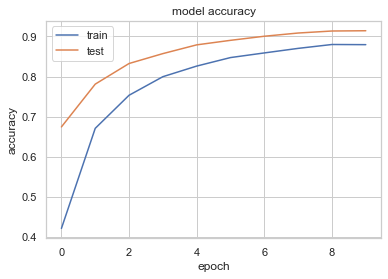

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Plot the Loss of the Classifier**

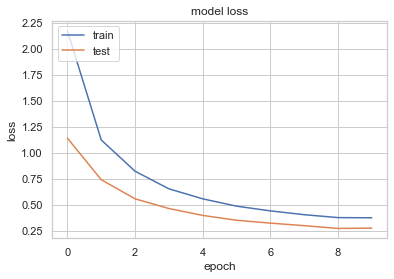

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Confusion Matrix**

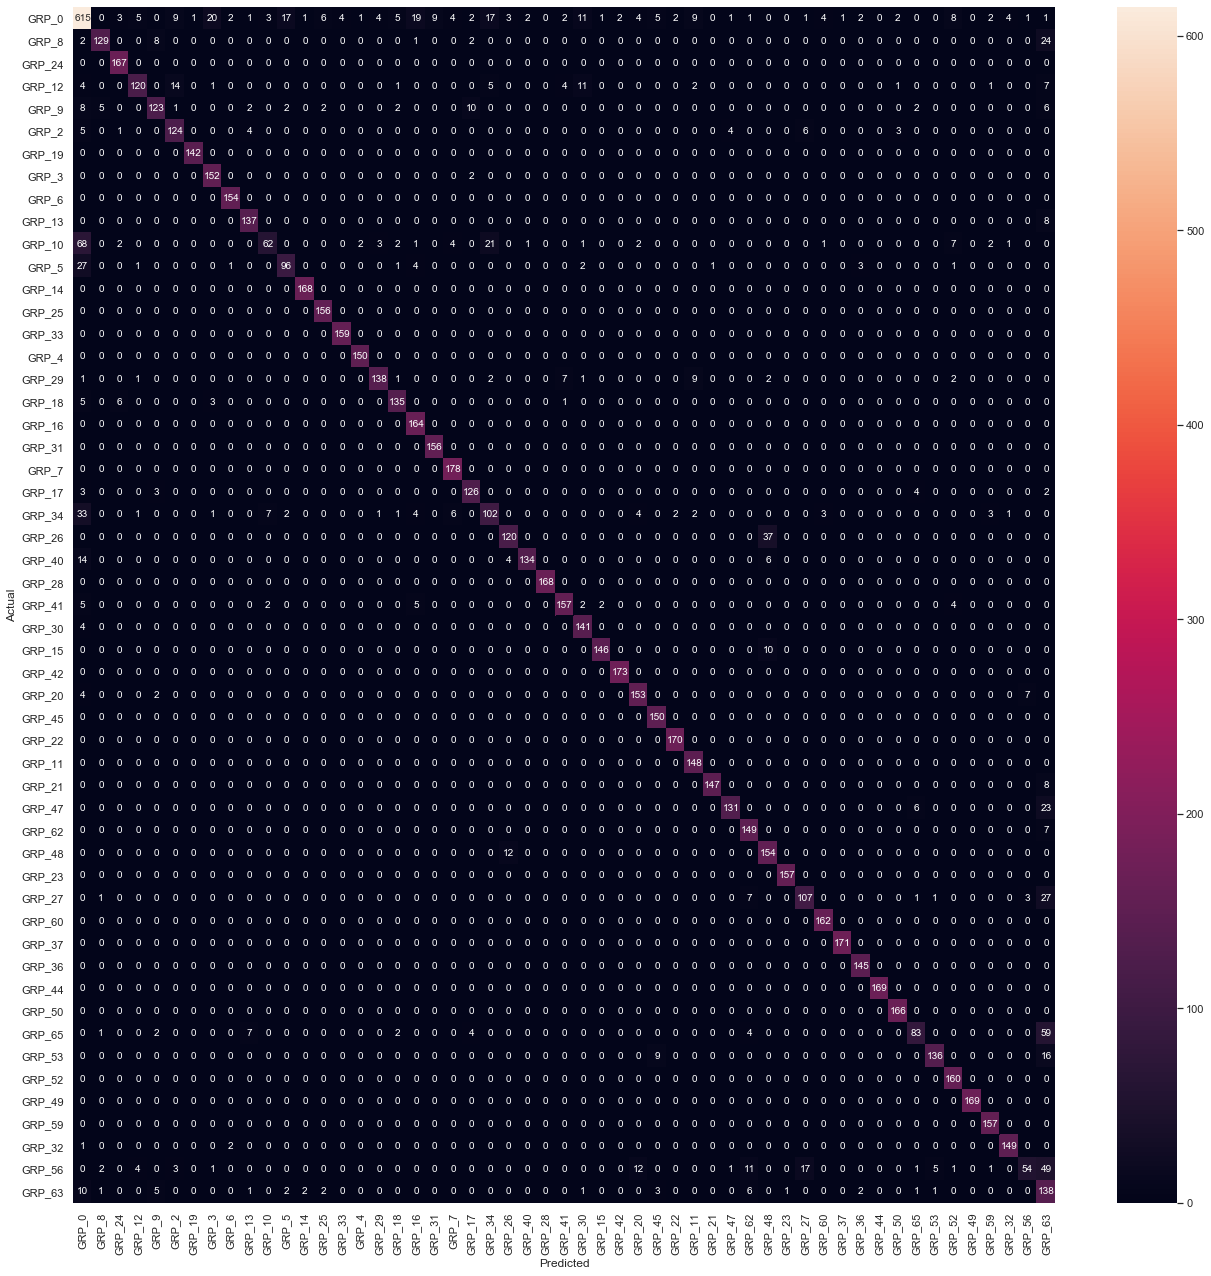

In [ ]:
conf_mat = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))  
#fig, ax = plt.subplots(figsize=(20,20))
plt.figure(figsize=(22,22))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=df['Assignment_Group_Updated'].unique(), yticklabels=df['Assignment_Group_Updated'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Inference from Confusion Matrix**

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. 

The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.
Many Assignment groups are not present in the test data. The diagonal element value for GRP_0 is high


**Classification Reports**

In [ ]:
print('Classification report:\n %s' % (classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))))

Classification report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.76       817
           1       0.93      0.78      0.85       166
           2       0.93      1.00      0.97       167
           3       0.91      0.70      0.79       171
           4       0.86      0.75      0.80       163
           5       0.82      0.84      0.83       147
           6       0.99      1.00      1.00       142
           7       0.85      0.99      0.92       154
           8       0.97      1.00      0.98       154
           9       0.90      0.94      0.92       145
          10       0.84      0.34      0.49       180
          11       0.81      0.70      0.75       137
          12       0.98      1.00      0.99       168
          13       0.94      1.00      0.97       156
          14       0.98      1.00      0.99       159
          15       0.98      1.00      0.99       150
          16       0.95      0.84      0.89       164
   

**Testing the BLSTM Model for a new ticket!**

In [ ]:
ticket = ['caller confirmed that he was able to login, checked the user name in ad and reset the password']
#vectorizing the tweet by the pre-fitted tokenizer instance
ticket = tokenizer.texts_to_sequences(ticket)
#padding the tweet to have exactly the same shape as `embedding_2` input
ticket = pad_sequences(ticket, maxlen=maxlen, value=0.0, padding='post')
print("Ticket :",ticket)
output = model.predict(ticket)
print("Output:",output)

Ticket : [[ 954 1563 5893  315   86  100   10   49  410  455  158   52  100   16
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    

In [ ]:
def decode(datum):
    return np.argmax(datum)

In [ ]:
decoded_Y = []
print("****************************************")
for i in range(output.shape[0]):
    datum = output[i]
    #print('index: %d' % i)
    #print('encoded datum: %s' % datum)
    decoded_datum = decode(output[i])
    #print('decoded datum: %s' % decoded_datum)
    decoded_Y.append(df['Assignment group'][decoded_datum])
    
print("Decoded_y:" , decoded_Y)

****************************************
Decoded_y: [0    GRP_0
0      NaN
0      NaN
0      NaN
0      NaN
     ...  
0      NaN
0      NaN
0      NaN
0      NaN
0      NaN
Name: Assignment group, Length: 8689, dtype: object]


**The model has predicted the incident ticket assignment group as GRP_0.**

**Saving the data to a CSV file.**

In [ ]:
#saving the data to a CSV file.
file_name='preprocessed_input_data.csv'
df.to_csv(file_name,encoding='utf-8',index=False)

#To delimit by a tab you can use the 'sep' argument
#When you are storing a DataFrame object into a csv file using the to_csv method, 
#no need to store the preceding indices of each row of the DataFrame object so passing a False boolean value to index parameter.

# Milestone 3

## Tuning of LSTM Model
**1. LSTM Merge Mode**

The Bidirectional wrapper layer also allows to specify the merge mode, that is how the forward and backward outputs should be combined before being passed on to the next layer.

The options are:
'sum': The outputs are added together.
'mul': The outputs are multiplied together.
'concat': The outputs are concatenated together (the default), providing double the number of outputs to the next layer.
'ave': The average of the outputs is taken.

'concat'is the default merge mode. Merge mode 'mul' and 'ave' didn't show any improvements in F1 score. However merge mode of 'sum' showed improved F1 score.

Look the following results with 17 epochs.

Fit an LSTM model with merge_mode="sum"

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=num_words, 
                        output_dim=embedding_size, 
                        weights=[embedding_matrix], 
                        input_length=maxlen, 
#                       mask_zero=True,
                        trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2), merge_mode="sum"))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(53, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history_mode_sum = model.fit(X_train, 
                    y_train, 
                    epochs=17, 
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 36480 samples, validate on 9120 samples
Epoch 1/17
36480/36480 [==============================] - 1061s 29ms/sample - loss: 1.7054 - acc: 0.5280 - val_loss: 0.9907 - val_acc: 0.7107
Epoch 2/17
36480/36480 [==============================] - 1110s 30ms/sample - loss: 1.0396 - acc: 0.6922 - val_loss: 0.6784 - val_acc: 0.7975
Epoch 3/17
36480/36480 [==============================] - 1099s 30ms/sample - loss: 0.7834 - acc: 0.7649 - val_loss: 0.5258 - val_acc: 0.8450
Epoch 4/17
36480/36480 [==============================] - 1081s 30ms/sample - loss: 0.6337 - acc: 0.8077 - val_loss: 0.4410 - val_acc: 0.8674
Epoch 5/17
36480/36480 [==============================] - 1076s 29ms/sample - loss: 0.5450 - acc: 0.8308 - val_loss: 0.3757 - val_acc: 0.8880
Epoch 6/17
36480/36480 [==============================] - 1077s 30ms/sample - loss: 0.4784 - acc: 0.8484 - val_loss: 0.3349 - val_acc: 0.9000
Epoch 7/17
36480/36480 [==============================] - 1077s 30ms/sample - loss: 0.4304 - acc: 0

Plot the Accuracy of the classifier

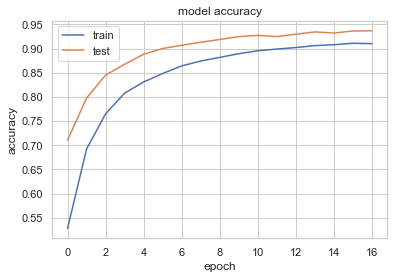

In [ ]:
plt.plot(history_mode_sum.history['acc'])
plt.plot(history_mode_sum.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

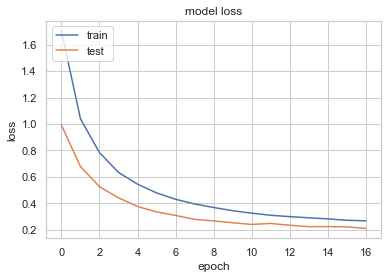

In [ ]:
#Plot the Loss of the Classifier
plt.plot(history_mode_sum.history['loss'])
plt.plot(history_mode_sum.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred_mode_sum = model.predict(X_test)

Accuracy of the model when merge mode is sum

In [ ]:
acc_test =model.evaluate(X_test,y_test)
print("Test Accuracy:",acc_test[1])

acc_train =model.evaluate(X_train,y_train)
print("Train Accuracy:",acc_train[1])

9120/9120 [==============================] - 40s 4ms/sample - loss: 0.2098 - acc: 0.9367
Test Accuracy: 0.9367325
36480/36480 [==============================] - 158s 4ms/sample - loss: 0.1500 - acc: 0.9490
Train Accuracy: 0.94898576


Classification Reports

In [ ]:
print('Classification report:\n %s' % (classification_report(y_test.argmax(axis=1), y_pred_mode_sum.argmax(axis=1))))

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.87       817
           1       0.99      0.86      0.92       166
           2       0.99      1.00      1.00       167
           3       0.94      0.89      0.92       171
           4       0.99      0.94      0.96       163
           5       0.92      1.00      0.96       147
           6       1.00      1.00      1.00       142
           7       0.94      1.00      0.97       154
           8       0.99      1.00      1.00       154
           9       0.97      0.94      0.96       145
          10       0.98      0.83      0.90       180
          11       0.95      0.87      0.91       137
          12       0.99      1.00      0.99       168
          13       0.98      1.00      0.99       156
          14       0.99      1.00      1.00       159
          15       0.99      1.00      1.00       150
          16       0.99      0.99      0.99       164
   

Observations (When compared to the original model created in Milestone 2)
With LSTM merge mode SUM, Test accuracy has improved to 93.67%, however training accuracy improved to 94.89%. The average F1 Score of the model is 0.57. We can go ahead with SUM.





**2.Number of LSTM Cells**

We cannot know the best number of memory cells for a given LSTM architecture. We must test a suite of different memory cells in LSTM hidden layers to see what works best. Let's take 3 different numbers of LSTM cells, 50, 100 and 200.

In [ ]:
epochs_lstm_cells = 2
params = [50, 100, 200]
n_repeats = 2

In [ ]:
# fit an LSTM model
def fit_model(n_cells):
    # define model
    model_lstm_cells = Sequential()
    model_lstm_cells.add(Embedding(input_dim=num_words, 
                            output_dim=embedding_size, 
                            weights=[embedding_matrix], 
                            input_length=maxlen, 
                            trainable=False))
    model_lstm_cells.add(SpatialDropout1D(0.2))
    model_lstm_cells.add(Bidirectional(LSTM(n_cells, dropout=0.2, recurrent_dropout=0.2), merge_mode="sum"))
    model_lstm_cells.add(Dense(100, activation='relu'))
    model_lstm_cells.add(Dropout(0.1))
    model_lstm_cells.add(Dense(53, activation='softmax'))
    # compile model
    model_lstm_cells.compile(loss='mse', optimizer='adam')
    # fit model
    #X_train, X_test, y_train, y_test
    model_lstm_cells.fit(X_train, 
                        y_train, 
                        epochs=epochs_lstm_cells, 
                        batch_size=batch_size,
                        validation_data=(X_test, y_test),
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
    # evaluate model
    loss = model_lstm_cells.evaluate(X_test, y_test, verbose=0)
    return loss

In [ ]:
from pandas import DataFrame

In [ ]:
# grid search parameter values
#scores = df(dataAugDF)
scores = DataFrame()
for value in params:
    # repeat each experiment multiple times
    loss_values = list()
    for i in range(n_repeats):
        loss = fit_model(value)
        loss_values.append(loss)
        print('>%d/%d param=%f, loss=%f' % (i+1, n_repeats, value, loss))
    # store results for this parameter
    scores[str(value)] = loss_values
# summary statistics of results
print(scores.describe())
# box and whisker plot of results
scores.boxplot()
pyplot.show()

Train on 36480 samples, validate on 9120 samples
Epoch 1/2
36480/36480 [==============================] - 270s 7ms/sample - loss: 0.0155 - val_loss: 0.0114
Epoch 2/2
36480/36480 [==============================] - 266s 7ms/sample - loss: 0.0106 - val_loss: 0.0083
>1/2 param=50.000000, loss=0.008316
Train on 36480 samples, validate on 9120 samples
Epoch 1/2
36480/36480 [==============================] - 271s 7ms/sample - loss: 0.0153 - val_loss: 0.0114
Epoch 2/2
36480/36480 [==============================] - 290s 8ms/sample - loss: 0.0107 - val_loss: 0.0083
>2/2 param=50.000000, loss=0.008276
Train on 36480 samples, validate on 9120 samples
Epoch 1/2
36480/36480 [==============================] - 1142s 31ms/sample - loss: 0.0141 - val_loss: 0.0096
Epoch 2/2
36480/36480 [==============================] - 1117s 31ms/sample - loss: 0.0092 - val_loss: 0.0070
>1/2 param=100.000000, loss=0.007026
Train on 36480 samples, validate on 9120 samples
Epoch 1/2
36480/36480 [==========================

Observations (When compared to the original model created in Milestone 2)
By Increasing the number of LSTM cells from 100 to 200 we can see the reduction in overall loss.

**3. Regularization**

LSTMs can quickly converge and even overfit on some sequence prediction problems. To counter this, regularization methods can be used. LSTMs supports regularization such as weight regularization that imposes pressure to decrease the size of network weights. Again, these can be set on the LSTM layer with the arguments.

In [ ]:
import tensorflow as tf

In [ ]:
embedding_size = 200
model_regularized = Sequential()
model_regularized.add(Embedding(input_dim=num_words, 
                        output_dim=embedding_size, 
                        weights=[embedding_matrix], 
                        input_length=maxlen, 
                        trainable=False))
model_regularized.add(SpatialDropout1D(0.2))
model_regularized.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2), merge_mode="sum"))
model_regularized.add(Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01),
                activity_regularizer=tf.keras.regularizers.l2(0.01)))
model_regularized.add(Dropout(0.1))
model_regularized.add(Dense(53, activation='softmax'))

In [ ]:
model_regularized.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs=20
batch_size = 60

In [ ]:
history_regularized = model_regularized.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 36480 samples, validate on 9120 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
36480/36480 [==============================] - 1061s 29ms/sample - loss: 4.3543 - acc: 0.1834 - val_loss: 2.8143 - val_acc: 0.3602
Epoch 2/20
36480/36480 [==============================] - 1103s 30ms/sample - loss: 2.6084 - acc: 0.4142 - val_loss: 2.1402 - val_acc: 0.5413
Epoch 3/20
36480/36480 [==============================] - 1113s 31ms/sample - loss: 2.1079 - acc: 0.5496 - val_loss: 1.7402 - val_acc: 0.6570
Epoch 4/20
36480/36480 [==============================] - 1121s 31ms/sample - loss: 1.8046 - acc: 0.6328 - val_loss: 1.5171 - val_acc: 0.7016
Epoch 5/20
36480/36480 [==============================] - 1118s 31ms/sample - loss: 1.6053 - acc: 0.6805 - val_loss: 1.3464 - val_acc: 0.7519
Epoch 6/20
36480/36480 [==============================] - 1122s 31ms/sample - loss: 1.4569 - acc: 0.7141 - val_loss: 1.2142 - val_acc: 0.7833
Epoch 7/20
36480/36480 [==============================] - 1117s 31ms/sample - loss: 1.3490 - acc: 0.7394 - val_loss: 1.1199 - val_acc: 0.7988
Epoch 

Plot the Accuracy of the classifier

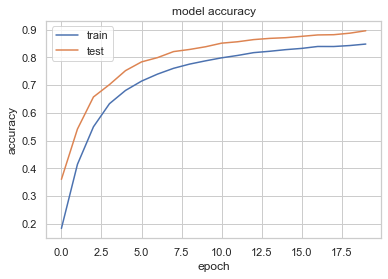

In [ ]:
plt.plot(history_regularized.history['acc'])
plt.plot(history_regularized.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

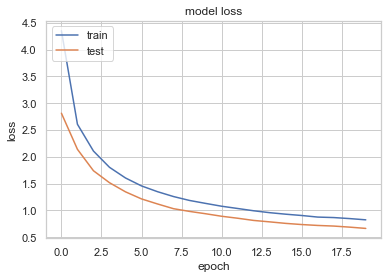

In [ ]:
#Plot the Loss of the Classifier
plt.plot(history_regularized.history['loss'])
plt.plot(history_regularized.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred_regularized = model_regularized.predict(X_test)

In [ ]:
acc_test_regularized =model_regularized.evaluate(X_test,y_test)
print("Test Accuracy:",acc_test_regularized[1])

acc_train_regularized = model_regularized.evaluate(X_train,y_train)
print("Train Accuracy:",acc_train_regularized[1])

9120/9120 [==============================] - 60s 7ms/sample - loss: 0.6634 - acc: 0.8956
Test Accuracy: 0.895614
36480/36480 [==============================] - 255s 7ms/sample - loss: 0.6104 - acc: 0.9102
Train Accuracy: 0.9101974


In [ ]:
print('Classification report:\n %s' % (classification_report(y_test.argmax(axis=1), y_pred_regularized.argmax(axis=1))))

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       817
           1       0.93      0.75      0.83       166
           2       0.99      1.00      0.99       167
           3       0.94      0.76      0.84       171
           4       0.83      0.83      0.83       163
           5       0.87      0.88      0.87       147
           6       1.00      1.00      1.00       142
           7       0.92      1.00      0.96       154
           8       0.98      1.00      0.99       154
           9       0.94      0.94      0.94       145
          10       0.78      0.44      0.57       180
          11       0.82      0.69      0.75       137
          12       0.92      1.00      0.96       168
          13       0.96      1.00      0.98       156
          14       0.96      1.00      0.98       159
          15       0.97      1.00      0.99       150
          16       0.97      0.88      0.92       164
   

**Observations:**

By adding regualarization on Dense layer using kernel_regularizer and activity_regularizer, no improvement is seen on train and validation data. F1 score dropped from 0.57 to 0.51 may be because of less data related to other categories.

**4. Pipeline**

Pipelines work by allowing for a linear sequence of data transforms to be chained together culminating in a modeling process that can be evaluated. Python scikit-learn provides a Pipeline utility to help automate machine learning workflows.The goal is to ensure that all of the steps in the pipeline are constrained to the data available for the evaluation, such as the training dataset or each fold of the cross validation procedure.

In [ ]:
# this calculates a vector of term frequencies
vect = CountVectorizer()
# this normalizes each term frequency
tfidf = TfidfTransformer()
#linear SVM classifier
clf = LinearSVC()

In [ ]:
from sklearn.pipeline import Pipeline
nlp_pipeline = Pipeline([
    ('vect',vect),
    ('tfidf',tfidf),
    ('clf',clf)
])

In [ ]:
#Splitting the train and test data
X_train_pip, X_test_pip, y_train_pip, y_test_pip = train_test_split(df['ticket_Desc_lemm'], df['Assignment_Group_Updated'], random_state = 0)
X_train_pip.shape,y_train_pip.shape,X_test_pip.shape,y_test_pip.shape

((34200,), (34200,), (11400,), (11400,))

In [ ]:
#fit trian data to the pipeline
nlp_pipeline.fit(X_train_pip,y_train_pip)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC())])

In [ ]:
# predict test instances
y_preds = nlp_pipeline.predict(X_test_pip)

# calculate f1
mean_f1 = f1_score(y_test_pip, y_preds, average='micro')
print('Mean f1 Score ---',mean_f1)

Mean f1 Score --- 0.9290350877192982


In [ ]:
print(classification_report(y_test_pip, y_preds))

              precision    recall  f1-score   support

       GRP_0       0.93      0.80      0.86      1002
      GRP_10       0.98      0.86      0.92       206
      GRP_11       0.99      1.00      1.00       199
      GRP_12       0.89      0.90      0.90       189
      GRP_13       0.98      0.95      0.97       221
      GRP_14       0.97      0.98      0.97       187
      GRP_15       0.99      1.00      1.00       200
      GRP_16       0.93      1.00      0.96       197
      GRP_17       0.99      1.00      0.99       185
      GRP_18       0.97      0.97      0.97       208
      GRP_19       0.86      0.86      0.86       203
       GRP_2       0.91      0.87      0.89       198
      GRP_20       1.00      1.00      1.00       192
      GRP_21       1.00      1.00      1.00       205
      GRP_22       0.99      1.00      0.99       213
      GRP_23       0.96      1.00      0.98       198
      GRP_24       0.98      0.99      0.98       216
      GRP_25       0.95    

Observations:
Pipeline and Feature Union as such doesnot improve performance of the models. Its adds more value by combining different rules and models, we can define out own transformers that will improve the performance. Here we have done basic pipeline model.

Pipelines help in optimizing entire workflow, preventing data leakage and code simplicity.

## Feature Engineering using LDA

Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. Its the process of using domain knowledge of the data to create features that make machine learning algorithms work. By creating features from raw data that help facilitate the machine learning process

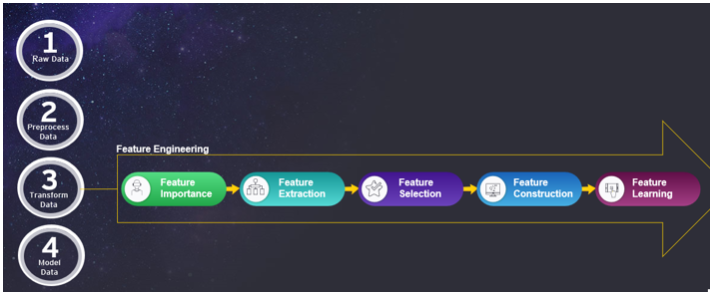

*Feature Importance:* An estimate of the usefulness of a feature

*Feature Extraction:* The automatic construction of new features from raw data

*Feature Selection:* From many features to a few that are useful

*Feature Construction: *The manual construction of new features from raw data

*Feature Learning:* The automatic identification and use of features in raw data

Topic Modeling is a technique to extract the hidden topics from large volumes of text. Latent Dirichlet Allocation(LDA) is a popular algorithm for topic modeling with excellent implementations in the Python’s Gensim package. The challenge, however, is how to extract good quality of topics that are clear, segregated and meaningful. This depends heavily on the quality of text preprocessing and the strategy of finding the optimal number of topics.

In [ ]:
!pip install googletrans
!pip install langdetect
!pip install Unidecode
!pip install --upgrade gensim
!pip install pyldavis
!pip install imblearn

In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.under_sampling import RandomUnderSampler


import nltk
nltk.download('stopwords')

from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91982\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# load the model
CleandataDataframe = load(open('AugmentedDataframe_0627.pkl', 'rb'))


In [ ]:
CleandataDataframe.shape

(45600, 32)

### Derive a separate column 'Urgency' based on the occurrence of following words

In [ ]:
urgency_list = ['urgent', 'as soon as possible','priority','immediate','asap','high priority'] 

In [ ]:
arr =[]
for ind in CleandataDataframe.index:
    row_val = CleandataDataframe['Description_updated'][ind]
    #print(row_val)
    res = [ele for ele in urgency_list if(ele in row_val)] 
    arr.append(str(bool(res)))
CleandataDataframe.insert(32, "Urgency", arr, True) 

In [ ]:
CleandataDataframe.head(5)

,index,Short description,Description,Caller,Assignment group,short_desc_len,short_des_word_count,Desc_len,Des_word_count,word_count,...,Clean Description_1,Clean_Shrt_Desc_SWR,Clean_Desc_SWR,Clean_Shrt_Desc_lem,Clean_Desc_lem,SD_translated,D_translated,Assignment_Group_Updated,Description_updated,Urgency
800,2599.0,call conference to nahytu,call conference to nahytu,oxlqvikazrvbahym,GRP_0,25.0,4.0,25.0,4.0,4.0,...,call conference to nahytu,call conference nahytu,call conference nahytu,call conference nahytu,call conference nahytu,call conference nahytu,call conference nahytu,GRP_0,call conference nahytu call conference nahytu,False
801,7862.0,mobile device activation,mobile device activation,aqritplubeuflorc,GRP_0,24.0,3.0,24.0,3.0,3.0,...,mobile device activation,mobile device activation,mobile device activation,mobile device activation,mobile device activation,mobile device activation,mobile device activation,GRP_0,mobile device activation mobile device activation,False
802,7863.0,unable to install engineering_tool,unable to install engineering_tool,anpoceztqturbxsg,GRP_0,34.0,4.0,34.0,4.0,5.0,...,unable to install engineering tool,unable install engineering tool,unable install engineering tool,unable install engineering tool,unable install engineering tool,unable install engineering tool,unable install engineering tool,GRP_0,unable install engineering tool unable install...,False
803,7864.0,password reset for bsopzxhi irfhcgzq,password reset for bsopzxhi irfhcgzq,wvngzrcasfmrzdth,GRP_0,36.0,5.0,36.0,5.0,5.0,...,password reset for bsopzxhi irfhcgzq,password reset bsopzxhi irfhcgzq,password reset bsopzxhi irfhcgzq,password reset bsopzxhi irfhcgzq,password reset bsopzxhi irfhcgzq,password reset bsopzxhi irfhcgzq,password reset bsopzxhi irfhcgzq,GRP_0,password reset bsopzxhi irfhcgzq password rese...,False
804,7865.0,password,\r\n\r\nreceived from: xzjlkfvc.agfmpyhr@gmail...,xzjlkfvcagfmpyhr,GRP_0,8.0,1.0,122.0,14.0,16.0,...,from hi please reset my password and sending t...,password,hi reset password sending password log well,password,hi reset password sending password log well,password,hi reset password sending password log well,GRP_0,password hi reset password sending password lo...,False


In [ ]:
desc_list = CleandataDataframe["Description_updated"].tolist()

### Applying TF-IDF Method for Feature Extraction

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=0.0001, use_idf=True, ngram_range=(1,3), norm='l2')
tfidf_matrix = tfidf_vectorizer.fit_transform(desc_list)

In [ ]:
terms = tfidf_vectorizer.get_feature_names()

print("Number of terms: ",len(terms))
## sum tfidf frequency of each term through documents
sums = tfidf_matrix.sum(axis=0)

## connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append( (term, sums[0,col] ))

## You can sort words based IDF score or create a word cloud for better data visualization.
ranking = pd.DataFrame(data, columns=['term','rank'])
ranking.sort_values('rank', inplace=True, ascending=False)

weights = {}
for index, row in ranking.iterrows() :
    weights.update({row['term'] : row['rank']})

Number of terms:  83840


In [ ]:
print("Terms sorted based on it's score. From Highest Rank to lowest")
ranking.head(10)

Terms sorted based on it's score. From Highest Rank to lowest


,term,rank
37103,job,1800.312723
37202,job scheduler,700.542555
63313,scheduler,700.542555
26111,failed,623.475045
26137,failed job scheduler,614.052862
26136,failed job,614.052862
51445,password,548.985840
37165,job job,541.015502
73968,tool,536.619919
23030,erp,521.950894


In [ ]:
#This function required for plotting cloud of words based on its weightage
def create_wordcloud(weights):
    plt.figure(figsize=(15,6), facecolor='k')
    wc = WordCloud(width=600, height=300)
    wc.generate_from_frequencies(weights)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


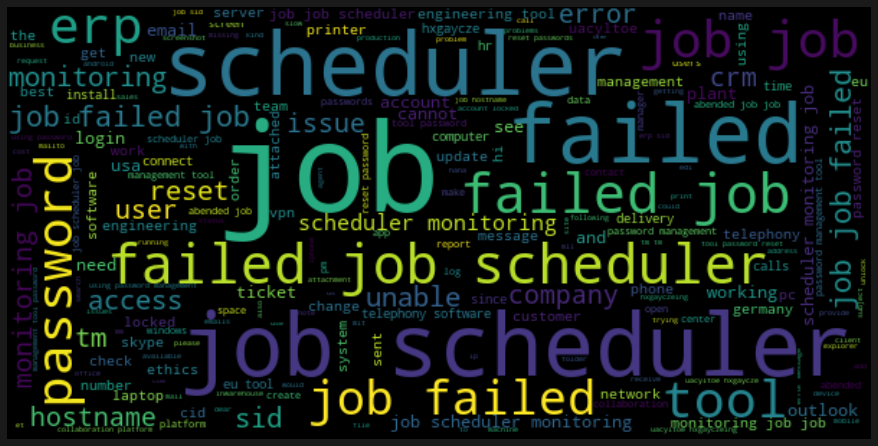

In [ ]:
create_wordcloud(weights)

In [ ]:
print("Terms sorted based on it's score. Last 10 ranks")
ranking.tail(10)

Terms sorted based on it's score. Last 10 ranks


,term,rank
20537,dsw suspicious ms,0.040268
40286,location santiago,0.040268
6379,bc jul sartlgeo,0.040268
32278,hostname santiago south,0.040268
32277,hostname santiago,0.040268
34650,inside jul sartlgeo,0.040268
2949,amerirtca sep sms,0.040268
2948,amerirtca sep,0.040268
20536,dsw suspicious,0.040268
5686,available reputation settings,0.040268



TF-IDF Summary We see that users are talking the most about password, com, erp, unable etc but we are not sure in what context topics like password, com etc are discussed as TF-IDF doesn't account for word position and context while scoring words.
We can visualize word corpus using word embeddings which are pre-trained on a neural network based on nearby context words.
In our case we will use t-SNE which stands for t-distributed stochastic neighbor embedding a popular dimensionality reduction technique to visualize higher dimension spaces in lower dimensions (e.g. 2-D) to visualize word embedding.

### Word Embeddings

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize
tokenized_list = []
unique_words = set() 

tokenized_sents = [word_tokenize(i) for i in desc_list]
for tokenized_words in tokenized_sents:
    
    for each_word in tokenized_words: 
        unique_words.add(each_word) 
      
print(unique_words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91982\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


{'kcudbnrw', 'pamxszek', 'venkbghksh', 'netzwerkeinstellungen', 'buyer', 'bachsmhdyhti', 'ofuhdesi', 'visible', 'esafrtbh', 'mbr', 'nvbw', 'exszgtwd', 'pwc', 'infos', 'bedord', 'vvggrthhibg', 'amadeu', 'exekirty', 'vksfrhdx', 'hygxzklauthuchidambaramdnty', 'berechnungsprogramdntym', 'recipient', 'kumghtwar', 'exbllhvzzxjfawq', 'mal', 'dmitazhw', 'isr', 'suhrhtyju', 'bt', 'usa', 'drivers', 'bvfdnale', 'hello', 'incl', 'noggtyuerp', 'mich', 'martif', 'upate', 'imaging', 'kindftyed', 'whereas', 'indirect', 'availability', 'refinery', 'kz', 'wdgebvpzagavan', 'addressees', 'hre', 'loginto', 'vzmneycx', 'migrate', 'dcd', 'miss', 'replaced', 'mokolthrl', 'converion', 'unnessary', 'lights', 'issued', 'wtqdyoinware', 'ndig', 'thjquiyl', 'dqvqojzonlcbau', 'bdclient', 'franhtyufurt', 'consulting', 'daylight', 'neues', 'ntydihzo', 'batia', 'absence', 'talk', 'tech', 'lbdl', 'wanrtyg', 'naveuythen', 'jwzlebap', 'raus', 'des', 'gew', 'dzbujamc', 'ltrobe', 'enviar', 'zrwdgsco', 'ticked', 'quarantined

In [ ]:
!pip install -U spacy

In [ ]:
!pip install adjustText

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
from sklearn.manifold import TSNE
from adjustText import adjust_text
print("Unique Words in the Data File:::",len(unique_words))
top_words = [word for word in unique_words if word in ranking["term"].values]
print("Length of Top Words based on the ranking using Word Embeddings:::",len(top_words))
print("Top Words based on the ranking using Word Embeddings:::",top_words)
word_glove_vectors = np.array([nlp(word).vector for word in top_words])

Unique Words in the Data File::: 13432
Length of Top Words based on the ranking using Word Embeddings::: 8523
Top Words based on the ranking using Word Embeddings::: ['pamxszek', 'buyer', 'bachsmhdyhti', 'visible', 'esafrtbh', 'pwc', 'infos', 'vksfrhdx', 'recipient', 'mal', 'suhrhtyju', 'bt', 'usa', 'drivers', 'bvfdnale', 'hello', 'incl', 'mich', 'upate', 'imaging', 'kindftyed', 'indirect', 'availability', 'kz', 'hre', 'vzmneycx', 'miss', 'replaced', 'converion', 'unnessary', 'lights', 'issued', 'wtqdyoinware', 'ndig', 'bdclient', 'franhtyufurt', 'daylight', 'batia', 'absence', 'talk', 'tech', 'wanrtyg', 'raus', 'des', 'gew', 'dzbujamc', 'ltrobe', 'enviar', 'zrwdgsco', 'ticked', 'quarantined', 'no', 'spdczoth', 'jpeg', 'emailing', 'companysecure', 'modific', 'eples', 'mapgzzbtnqsozevisyen', 'prarthyr', 'qnt', 'postbox', 'referencing', 'matheywt', 'calling', 'exited', 'cindy', 'dhermosi', 'tcbjyqps', 'vsbhyrt', 'vendorreference', 'necessarily', 'fromentityheader', 'qkspyrdm', 'al', 'rec

In [ ]:
def visualize_word_embedding(words,wvs) :
         
    tsne = TSNE(n_components=2, n_iter=5000, random_state=0, perplexity=5)
    np.set_printoptions(suppress=True)
    T = tsne.fit_transform(wvs)
    labels = words

    plt.figure(num=1, figsize=(20, 10)) # dpi=10, facecolor='w'
    plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
    texts = []
    for label, x, y in zip(labels, T[:, 0], T[:, 1]):
        texts.append(plt.text(x, y, label))
        #plt.annotate(label, xy=(x + 1, y + 1), xytext=(0, 0), textcoords='offset points', fontsize=10)

    adjust_text(texts, only_move={'points':'y', 'text':'y'} , arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
    plt.show()    


#nlp = spacy.load('en')
nlp = spacy.load('en_core_web_sm')

#nlp = spacy.load('en')
doc = nlp(u'This is a sentence')
total_vectors = len(nlp.vocab.vectors)
print('Total word vectors:', total_vectors)  

Total word vectors: 0


In [ ]:
#View Word Embeddings
from sklearn.manifold import TSNE
visualize_word_embedding(top_words, word_glove_vectors)  

In [4]:
#@title Process Overview
from IPython.display import Image 

Image("/content/drive/My Drive/Colab Notebooks/AI ML/Projects/Capstone Project/word_embeddings.GIF", width=900)

ValueError: ignored

TF-IDF and word embeddings which helped to trim high and low-frequency words and use pre-trained word vectors for visualizing word corpus. 
From the above diagram, we can derive the following clusters:

Cluster1: Comprisingg of Notified, Locked, Failed,attached, received

Cluster2: VPN, Microsoft, Windows,CRM

Cluster3: login,unable,backup

Cluster4: internet,email,error,power

above clusters are derived based on the visualization, we can also list some more

###Latent Dirichlet Allocation(LDA)

It is a popular algorithm for topic modeling with excellent implementations in the Python’s Gensim package to extract the hidden topics from large volumes of text.It builds a topic per document model and words per topic model, modeled as Dirichlet distributions. We will use gensim to implement LDA and we are going to apply LDA the above Dataframe and split them into different topics.
The main inputs needed for doing LDA is:

corpus
dictionary of words with term frequency 

Before we apply LDA, we need to do necessary Cleaning of Data Set by using Stop Words, Tokenizing, Bigram/Trigram and finally creating Corpus

In [ ]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
# Vectorizations
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# Tokenize the ticket_Desc attribute of GRP_0 records
df_words = list(sent_to_words(CleandataDataframe["Description_updated"].values.tolist()))
df_words = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in df_words]

# Build the bigram
bigram = gensim.models.Phrases(df_words, min_count=5, threshold=100) # higher threshold fewer phrases.

# Faster way to get a sentence clubbed as bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
df_words_bigrams = [bigram_mod[doc] for doc in df_words]

# Create Dictionary
id2word = corpora.Dictionary(df_words_bigrams)
# Term Document Frequency
#using doc2bow,we create a dictionary reporting how many words and how many times those words appear.
corpus = [id2word.doc2bow(text) for text in df_words_bigrams]

**Building the TOPIC Model: **

We have everything required to train the LDA model. In addition to the corpus and dictionary,
you need to provide the number of topics as well.
Apart from that, alpha and other hyperparameters that affect sparsity of the topics.
According to the Gensim docs, both defaults to 1.0/num_topics prior.
chunksize is the number of documents to be used in each training chunk.
update_every determines how often the model parameters should be updated and passes is the total number of training passes.

In [ ]:
#Lets build the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

for idx, topic in lda_model.print_topics():
    print('Topic: {} \nWords: {}'.format(idx+1, topic))
    print()

Topic: 1 
Words: 0.207*"device" + 0.168*"com" + 0.058*"sales" + 0.043*"edi" + 0.040*"inc" + 0.034*"gr" + 0.034*"ksb_ag" + 0.031*"job" + 0.020*"technical" + 0.019*"provided"

Topic: 2 
Words: 0.354*"de" + 0.027*"time" + 0.027*"install" + 0.022*"field" + 0.020*"summary" + 0.017*"der" + 0.016*"und" + 0.016*"problems" + 0.014*"die" + 0.014*"receiving"

Topic: 3 
Words: 0.120*"usa" + 0.098*"phone" + 0.079*"currently" + 0.079*"mobile" + 0.071*"jkuaslxe_hrodszpl" + 0.071*"gezpktrq_opkqwevj" + 0.069*"work" + 0.040*"requires" + 0.035*"travelling" + 0.035*"outside"

Topic: 4 
Words: 0.085*"ip" + 0.043*"eva" + 0.037*"datacenter" + 0.035*"internal" + 0.034*"primary" + 0.033*"dns" + 0.030*"eu" + 0.028*"dyhtuiel" + 0.028*"network" + 0.027*"responding_infoblox"

Topic: 5 
Words: 0.549*"data" + 0.084*"erp" + 0.044*"receive" + 0.032*"li" + 0.022*"client" + 0.017*"delivery" + 0.017*"plant" + 0.016*"please" + 0.014*"co" + 0.012*"sid"

Topic: 6 
Words: 0.313*"android" + 0.093*"tool" + 0.041*"stefyty" + 0.

**View the topics in LDA model**

The above LDA model is built with 8 different topics where each topic is a combination of keywords and each keyword contributes a certain weightage to the topic. We decided to use 8 Topics as adding more Topics does not give enough details.

In [ ]:
# Visualize the topics
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.080662 -0.287804       1        1  18.216948
7     -0.315630  0.003813       2        1  17.048418
6     -0.296637 -0.064547       3        1  15.555033
3      0.156178 -0.230665       4        1  13.190773
1      0.055026  0.172208       5        1  12.789342
4      0.028910  0.227661       6        1   9.355732
0      0.106250  0.101045       7        1   7.297916
2      0.185241  0.078289       8        1   6.545839, topic_info=                      Term          Freq         Total Category  logprob  \
470                   data  59889.000000  59889.000000  Default  30.0000   
1716               android  66683.000000  66683.000000  Default  29.0000   
540                     de  53365.000000  53365.000000  Default  28.0000   
2814                   sep  36190.000000  36190.000000  Default  27.0000   
4                   device  17608.000000  17608.000000  Default  26.0000   
...                    ...           ...           ...      ...      ...   
1251               receipt   2142.701660   2632.368408   Topic8  -3.5713   
873               schedule    578.350769    962.922974   Topic8  -4.8809   
174                  mails    374.493744   2127.891602   Topic8  -5.3155   
13705                 snmp    393.767914   4622.776855   Topic8  -5.2653   
13704  responding_infoblox    393.767914   4622.776855   Topic8  -5.2653   

       loglift  
470    30.0000  
1716   29.0000  
540    28.0000  
2814   27.0000  
4      26.0000  
...        ...  
1251    2.5205  
873     2.2165  
174     0.9890  
13705   0.2634  
13704   0.2634  

[375 rows x 6 columns], token_table=       Topic      Freq             Term
term                                   
13648      1  0.009344  accepted_travel
13648      5  0.015574  accepted_travel
13648      6  0.974917  accepted_travel
76         1  0.029370           access
76         3  0.970633           access
...      ...       ...              ...
1097       6  0.001291          workers
173        1  0.999503          working
753        4  0.999793            would
1793       5  0.997058               zu
1793       7  0.001947               zu

[669 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 8, 7, 4, 2, 5, 1, 3])

As we can see the Topics are well separated from each other and if we hover over each topic, it will display 30 most terms which contributed towards the Topic

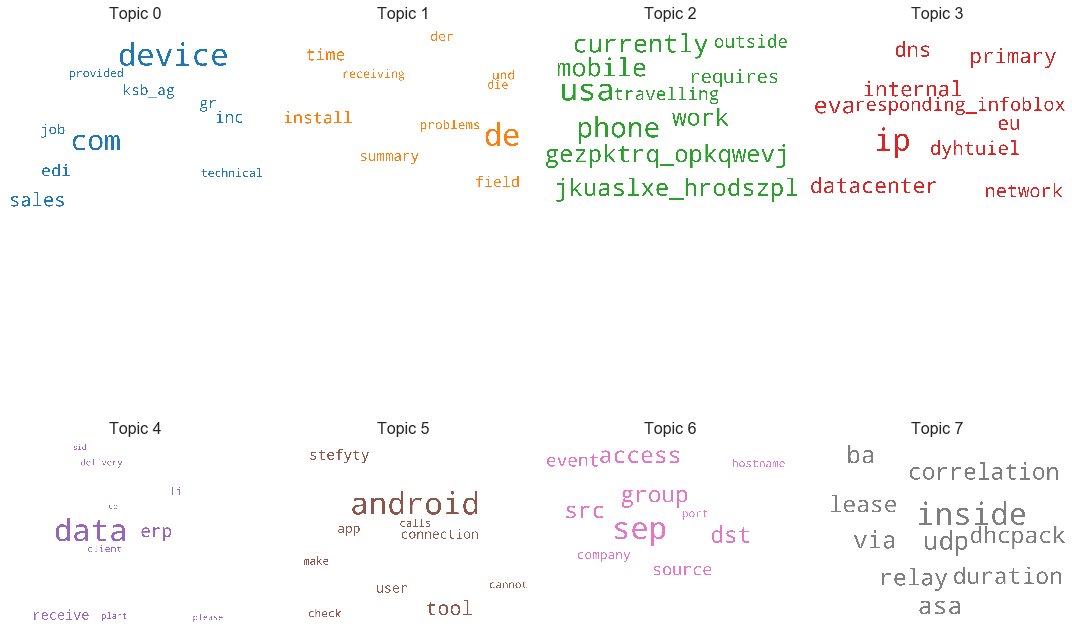

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 4, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

We applied for various combination of Topic Numbers and finally arrived at 8 number of Topics which can broadly classify the record set. We then decided to give a name to each Topic based on the word cloud it has.

In [ ]:
#Run LDA for GRP_0
#Function to determine the topic
TOPICS = {1: "Job Scheduler Issue", 2: "Account Issue", 3: "Phone Wireless Issue", 4: "Network Issue", 5: "ERP Issue", 6: "Connection Issue", 7: "Access Issue", 8: "Password Issue"}
def get_groups(text):
    bow_vector = id2word.doc2bow([word for word in simple_preprocess(text) if word not in STOPWORDS])
    index, score = sorted(lda_model[bow_vector][0], key=lambda tup: tup[1], reverse=True)[0]
    return TOPICS[index+1 if score > 0.5 else 4], round(score, 2)

In [ ]:
# filter the records assigned to only GRP_0
#grp0_tickets = df_train[CleandataDataframe['Assignment group'] == 'GRP_0']
grp0_tickets = CleandataDataframe[CleandataDataframe['Assignment_Group_Updated'] == 'GRP_0']
grp0_tickets["Assignment_Group_Updated"].head(5)

800    GRP_0
801    GRP_0
802    GRP_0
803    GRP_0
804    GRP_0
Name: Assignment_Group_Updated, dtype: object

In [ ]:
# Check for a Random record
text = grp0_tickets.reset_index().loc[np.random.randint(0, grp0_tickets.shape[1]),'Description_updated']
topic, score = get_groups(text)
print(f'Text:{text}\nTopic:{topic}\nScore:{score}')

Text:vitalyst transfer service unavailable crm online vitalyst transfer service unavailable crm online
Topic:Connection Issue
Score:0.5600000023841858


In [ ]:
# Apply the function to the df[Description_updated]
CleandataDataframe.insert(loc=CleandataDataframe.shape[1]-1, 
                   column='Topic', 
                   value=[get_groups(text)[0] for text in CleandataDataframe.Description_updated])
CleandataDataframe.head()

,index,Short description,Description,Caller,Assignment group,short_desc_len,short_des_word_count,Desc_len,Des_word_count,word_count,...,Clean_Shrt_Desc_SWR,Clean_Desc_SWR,Clean_Shrt_Desc_lem,Clean_Desc_lem,SD_translated,D_translated,Assignment_Group_Updated,Description_updated,Topic,Urgency
800,2599.0,call conference to nahytu,call conference to nahytu,oxlqvikazrvbahym,GRP_0,25.0,4.0,25.0,4.0,4.0,...,call conference nahytu,call conference nahytu,call conference nahytu,call conference nahytu,call conference nahytu,call conference nahytu,GRP_0,call conference nahytu call conference nahytu,Network Issue,False
801,7862.0,mobile device activation,mobile device activation,aqritplubeuflorc,GRP_0,24.0,3.0,24.0,3.0,3.0,...,mobile device activation,mobile device activation,mobile device activation,mobile device activation,mobile device activation,mobile device activation,GRP_0,mobile device activation mobile device activation,Network Issue,False
802,7863.0,unable to install engineering_tool,unable to install engineering_tool,anpoceztqturbxsg,GRP_0,34.0,4.0,34.0,4.0,5.0,...,unable install engineering tool,unable install engineering tool,unable install engineering tool,unable install engineering tool,unable install engineering tool,unable install engineering tool,GRP_0,unable install engineering tool unable install...,Connection Issue,False
803,7864.0,password reset for bsopzxhi irfhcgzq,password reset for bsopzxhi irfhcgzq,wvngzrcasfmrzdth,GRP_0,36.0,5.0,36.0,5.0,5.0,...,password reset bsopzxhi irfhcgzq,password reset bsopzxhi irfhcgzq,password reset bsopzxhi irfhcgzq,password reset bsopzxhi irfhcgzq,password reset bsopzxhi irfhcgzq,password reset bsopzxhi irfhcgzq,GRP_0,password reset bsopzxhi irfhcgzq password rese...,Password Issue,False
804,7865.0,password,\r\n\r\nreceived from: xzjlkfvc.agfmpyhr@gmail...,xzjlkfvcagfmpyhr,GRP_0,8.0,1.0,122.0,14.0,16.0,...,password,hi reset password sending password log well,password,hi reset password sending password log well,password,hi reset password sending password log well,GRP_0,password hi reset password sending password lo...,Password Issue,False


In [ ]:
# Count the records based on Topics
CleandataDataframe.Topic.value_counts()

Network Issue           34322
Job Scheduler Issue      3685
Connection Issue         3035
Account Issue            1509
Password Issue           1287
ERP Issue                 674
Access Issue              643
Phone Wireless Issue      445
Name: Topic, dtype: int64

In [ ]:
CleandataDataframe_subset = CleandataDataframe[['Description_updated', 'Topic','Assignment_Group_Updated']] 


In [ ]:
X_sam= CleandataDataframe_subset.drop(['Assignment_Group_Updated','Topic'], axis=1)
y_sam=CleandataDataframe_subset.Topic
len(X_sam),len(y_sam)

(45600, 45600)

###Plot the pie chart showing the percentage of data in differnt topics after LDA

Information of the data set after making it balanced by under-sampling: 
 sampling_strategy=auto 
 y: Counter({'Access Issue': 445, 'Account Issue': 445, 'Connection Issue': 445, 'ERP Issue': 445, 'Job Scheduler Issue': 445, 'Network Issue': 445, 'Password Issue': 445, 'Phone Wireless Issue': 445})


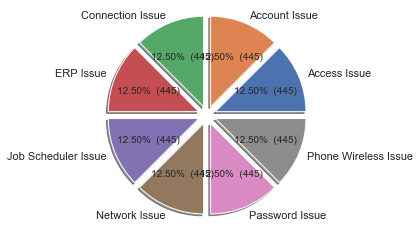

In [ ]:
def plot_pie(y):
    """ a function to plot the pie chart showing the percentage of data in differnt topics after LDA"""
    target_stats = Counter(y)
    labels = list(target_stats.keys())
    sizes = list(target_stats.values())
    explode = tuple([0.1] * len(target_stats))

    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct * total / 100.0))
            return '{p:.2f}%  ({v:d})'.format(p=pct, v=val)
        return my_autopct

    fig, ax = plt.subplots()
    ax.pie(sizes, explode=explode, labels=labels, shadow=True,
           autopct=make_autopct(sizes))
    ax.axis('equal')

# Instantiate the UnderSampler class
sampling_strategy = 'auto'
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=0)
# Fit the data
X_res, y_res = rus.fit_resample(X_sam,y_sam)
print('Information of the data set after making it '
      'balanced by under-sampling: \n sampling_strategy={} \n y: {}'
      .format(sampling_strategy, Counter(y_res)))
plot_pie(y_res)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report

Initially we ran our Models on the existing groups and found out that both SVM and LSTM Bidirectional works better. Now we will apply the same modelling technique but on the the newly generated Topics generated post LDA Feature Engineering Analysis

In [ ]:
#count_vect = CountVectorizer()
#x_train_counts = count_vect.fit_transform(CleandataDataframe['Description_updated'])
#print(x_train_counts.shape)
#print(count_vect.vocabulary_)

(45600, 13339)


In [ ]:
#new
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(CleandataDataframe['Description_updated']+' ' + CleandataDataframe['Topic'])
print(x_train_counts.shape)
#print(count_vect.vocabulary_)

(45600, 13339)


In [ ]:
#X=CleandataDataframe['Description_updated']
#y=CleandataDataframe['Topic']

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X=CleandataDataframe['Description_updated'] + ' ' + CleandataDataframe['Topic']
y=CleandataDataframe['Assignment_Group_Updated']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
print(x_train_tfidf.shape)

(45600, 13339)


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x_train_tfidf, y, test_size=0.3)

In [ ]:
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((31920, 13339), (31920,), (13680, 13339), (13680,))

In [ ]:
compare_results = pd.DataFrame(columns=['Algorithm Name', 'Accuracy', 'F1 Score'])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='linear').fit(train_x, train_y)
y_train_pred = clf.predict(train_x)
train_acc_score = accuracy_score(train_y, y_train_pred)
print("SVM-Linerar Train Accuracy : ", train_acc_score)
y_pred = clf.predict(test_x)
test_acc_score = accuracy_score(test_y, y_pred)
print("SVM-Linerar Test Accuracy : ", test_acc_score)
f_sc = f1_score(test_y, y_pred, average='weighted', labels=np.unique(y_pred))
print("SVM F1 Score: ", f_sc)

SVM-Linerar Train Accuracy :  0.9405388471177945
SVM-Linerar Test Accuracy :  0.9256578947368421
SVM F1 Score:  0.9283834809609413


#Model Evaluation

Out of all the models we've tried, in traditional ML algorithms, Support Vector Machine and RandomForestClassifier are performing better than all others. But these models are highly overfitted.

LSTM is efficient of dealing with textual data. Bidirectional LSTMs are an extension of traditional LSTMs that can improve model performance on classification problems.Using bidirectional will run your inputs in two ways, one from past to future and one from future to past and what differs this approach from unidirectional is that in the LSTM that runs backwards you preserve information from the future and using the two hidden states combined you are able in any point in time to preserve information from both past and future.


     | Algorithm                                          | Train_Accuracy   | Test_accuracy  |
     |----------------------------------------------------|------------------|----------------|
     | Multinomail NB                                     |  81.61           |  80.17         | 
     -----------------------------------------------------|------------------|----------------|
     | K Nearest Neighbours                               |  88.99           |  86.00         | 
     -----------------------------------------------------|------------------|----------------|
     | Support Vector Machine                             |  92.38           |  90.68         | 
     -----------------------------------------------------|------------------|----------------|
     | Decision Tree Classifier                           |  51.47           |  49.92         | 
     -----------------------------------------------------|------------------|----------------|
     | Bagging Classifier                                 |  60.59           |  58.88         | 
     -----------------------------------------------------|------------------|----------------|
     | RandomForest Classifier                            |  83.68           |  82.10         | 
     -----------------------------------------------------|------------------|----------------|
     | Adaboost  Classifier                               |  11.99           |  12.20         |
     -----------------------------------------------------|------------------|----------------|
     | Bidirectional LSTM(epochs=10)                      |  89.69           |  87.90         | 
     -----------------------------------------------------|------------------|----------------|
     | Bidirectional LSTM (merge_mode="sum", epochs=17)   |  94.89           |  93.67         | 
     -----------------------------------------------------|------------------|----------------|
     | Bidirectional LSTM (Regularization on Dense layer) |  91.01           |  89.56         | 
     -----------------------------------------------------|------------------|----------------|
     | LDA GENSIM - SVM Classifier                        |  94.05           |  92.56         | 
     -----------------------------------------------------|------------------|----------------|

#Other Model Tried

## BERT
**BERT Model code is provided into separate notebook file due to its requirement of the model for the lower Tensorflow version**

**BERT** stands for **Bidirectional Encoder Representations from Transformers**. It is designed to pre-train deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context. As a result, the pre-trained BERT model can be fine-tuned with just one additional output layer to create state-of-the-art models for a wide range of NLP tasks.



1.  BERT is based on the Transformer architecture.
2.  BERT is pre-trained on a large corpus of unlabelled text including the entire Wikipedia(that’s 2,500 million words!) and Book Corpus (800 million words).
3. BERT is a “deeply bidirectional” model. Bidirectional means that BERT learns information from both the left and the right side of a token’s context during the training phase.



**BERT Results**

We got the F1 score 94% in case of BERT Model

# Testing approch on the tickets data!
During data pre-processing, we had removed deterministic groups with  which have lesser number of ticket assignments (in 10's max). If there are standard patterns found in ticket assignment to groups based on content of short description and description then such groups are removed from the Machine Learning process. It results in a reduction of Target class from 74 to 54 groups. 

When a new ticket arrives it will be first evaluated against the deterministic rules with the help of patterns matching against short description and description. If there are no deterministic groups found then ML model prediction will be run. (Evaluation method is provided in the data_rules.py file.)

**By above approach, we have eliminated the limitation of having  probability to miss the classification of any new ticket even Machine Learning done on 54 groups.**


# Conclusion
In this project, a model based on supervised machine learning algorithms is proposed to assign tickets automatically. Preprocessed dataset consisting of previously categorized tickets are used to train classification algorithms. We have implemented different classification algorithms to evaluate performances comparatively. We tried tuning the model using different hyper parameters for better performance and we have achieved the planned target.
 
**BLSTM, LDA GENSIM - SVM Classifier & BERT gave better accuracy.**

# Comparison to Benchmark 
From the given problem description, we could see that the existing system is able to assign 75% of the tickets correctly.

So our objective here is to build an AI-based classifier model to assign the tickets to right functional groups by analysing the given description with an accuracy of at least 85%.

From the prediction results we see that the BLSTM, LDA GENSIM - SVM Classifier & BERT  model based on the augmented data are able to achieve an accuracy more than 91% which is above our benchmark.


# Closing Reflection
We found the data was present in multiple languages and in various formats such as emails, chat, etc bringing in a lot of variability in the data to be analyzed. The Business can improve the process of raising tickets via a common unified IT Ticket Service Portal which reduces the above mentioned variability. By doing this, the model can perform better which can help businesses to identify the problem area for relevant clusters of topics.